In this notebook we have visiualized dynamics of Covid Deaths accross all county of New York State. Our main motive was to answer following questions:
1. How the dynamics of the pandemic have shifted over the past two years.
1. Do counties follow any trend for Covid Deaths and peaks. Does any county followed the other county, was there any corrleation.
2. How was the dynamics of Covid Deaths with respect to population, were cases always high in counties with higher population.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.animation as ani
from matplotlib.pyplot import figure
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [11]:
df = pd.read_parquet('../data/processed_datasets/final_dataset_v3.parquet')
df = df.filter(items=['date', 'county','daily_deaths','POP2020'])
df.rename(columns={'county':'COUNTY'},inplace=True)
df['date'] = pd.to_datetime(df['date'])
df = df.reset_index()
df.drop(['index'], inplace=True, axis=1)
df.head()

,date,COUNTY,daily_deaths,POP2020
0,2020-03-26,Albany,0.0,314848
1,2020-03-26,Suffolk,2.0,1524665
2,2020-03-26,Suffolk,2.0,1524665
3,2020-03-26,Suffolk,2.0,1524665
4,2020-03-26,Suffolk,2.0,1524665


In [12]:
df['deaths_by_pop'] = df.apply(lambda x: x['daily_deaths']/x['POP2020'], axis=1)
df = df.rename(columns={'deaths_by_pop': 'daily_deaths_by_pop'})

In [13]:
df.head()

,date,COUNTY,daily_deaths,POP2020,daily_deaths_by_pop
0,2020-03-26,Albany,0.0,314848,0.000000
1,2020-03-26,Suffolk,2.0,1524665,0.000001
2,2020-03-26,Suffolk,2.0,1524665,0.000001
3,2020-03-26,Suffolk,2.0,1524665,0.000001
4,2020-03-26,Suffolk,2.0,1524665,0.000001


In [14]:
#!pip3 install contextily
import contextily as cx

In [15]:
street_map = gpd.read_file('../data/raw_datasets/NYS_Civil_Boundaries.shp.zip',)

In [16]:
import matplotlib.colors as colors
import mapclassify
# import geoplot
%matplotlib inline


def plot_geo_data(df, col_name, ax, fig, title="", show_base_cbar=False, show_base_map=False, cmap='Reds'):
    k = 1600  # I find that the more colors, the smoother the viz becomes as data points are spread across gradients
    cmap = cmap
    figsize = (20, 15)
    scheme = 'Quantiles'
    crs = {'init': 'epsg:4326'}

    subset = df.copy()
    subset['pop_density'] = subset['POP2020']/subset['CALC_SQ_MI']

    subset = subset.to_crs(crs)
    subset.plot(column=col_name, cmap=cmap, figsize=figsize, ax=ax,
                scheme=scheme, k=k, legend=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # Adding Colorbar for legibility

    # normalize color
    vmin, vmax, vcenter = subset[col_name].min(
    ), subset[col_name].max(), subset[col_name].mean()
    divnorm = colors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    # create a normalized colorbar
    if show_base_cbar:
        cbar = plt.cm.ScalarMappable(norm=divnorm, cmap=cmap)
        fig.colorbar(cbar, ax=ax)
    ax.set(title=title,
           ylabel="Lattitude", xlabel="Longitude")
    if show_base_map:
        cx.add_basemap(ax, crs=crs, source=cx.providers.Stamen.TonerLite)
# plt.show()


**Population Density in New York State**

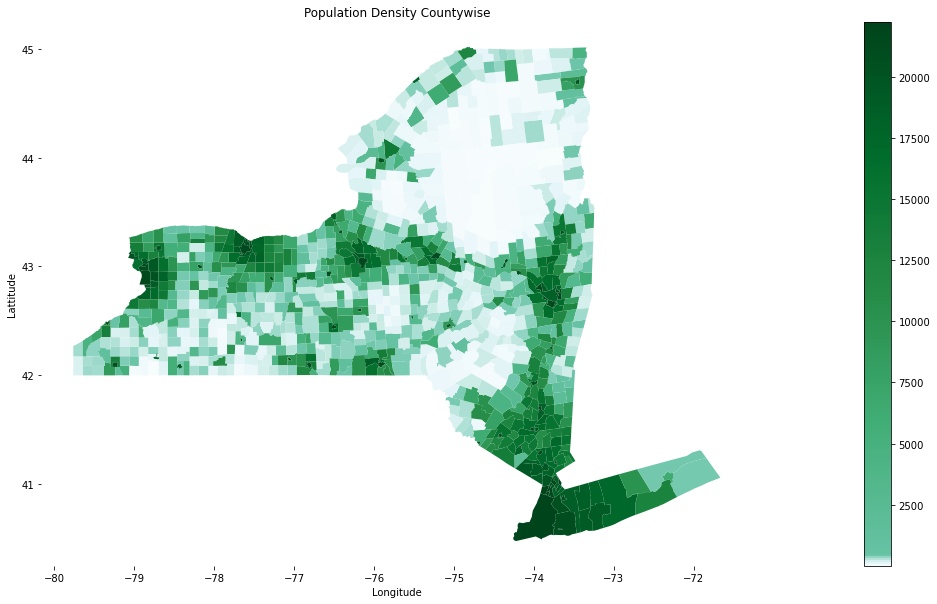

In [17]:
fig, ax = plt.subplots(figsize=(40, 10))
plot_geo_data(street_map, 'pop_density', ax=ax, fig=fig, show_base_cbar=True,cmap='BuGn',title='Population Density Countywise')


**Let us visualize the dynamics of pandemic over past years (deaths) accross all the county of NY state**

Pandemic rolled accross the U.S. unevenly and in multiple waves 

**First wave - was largely geographically concentrated and in particular the New York City region.**

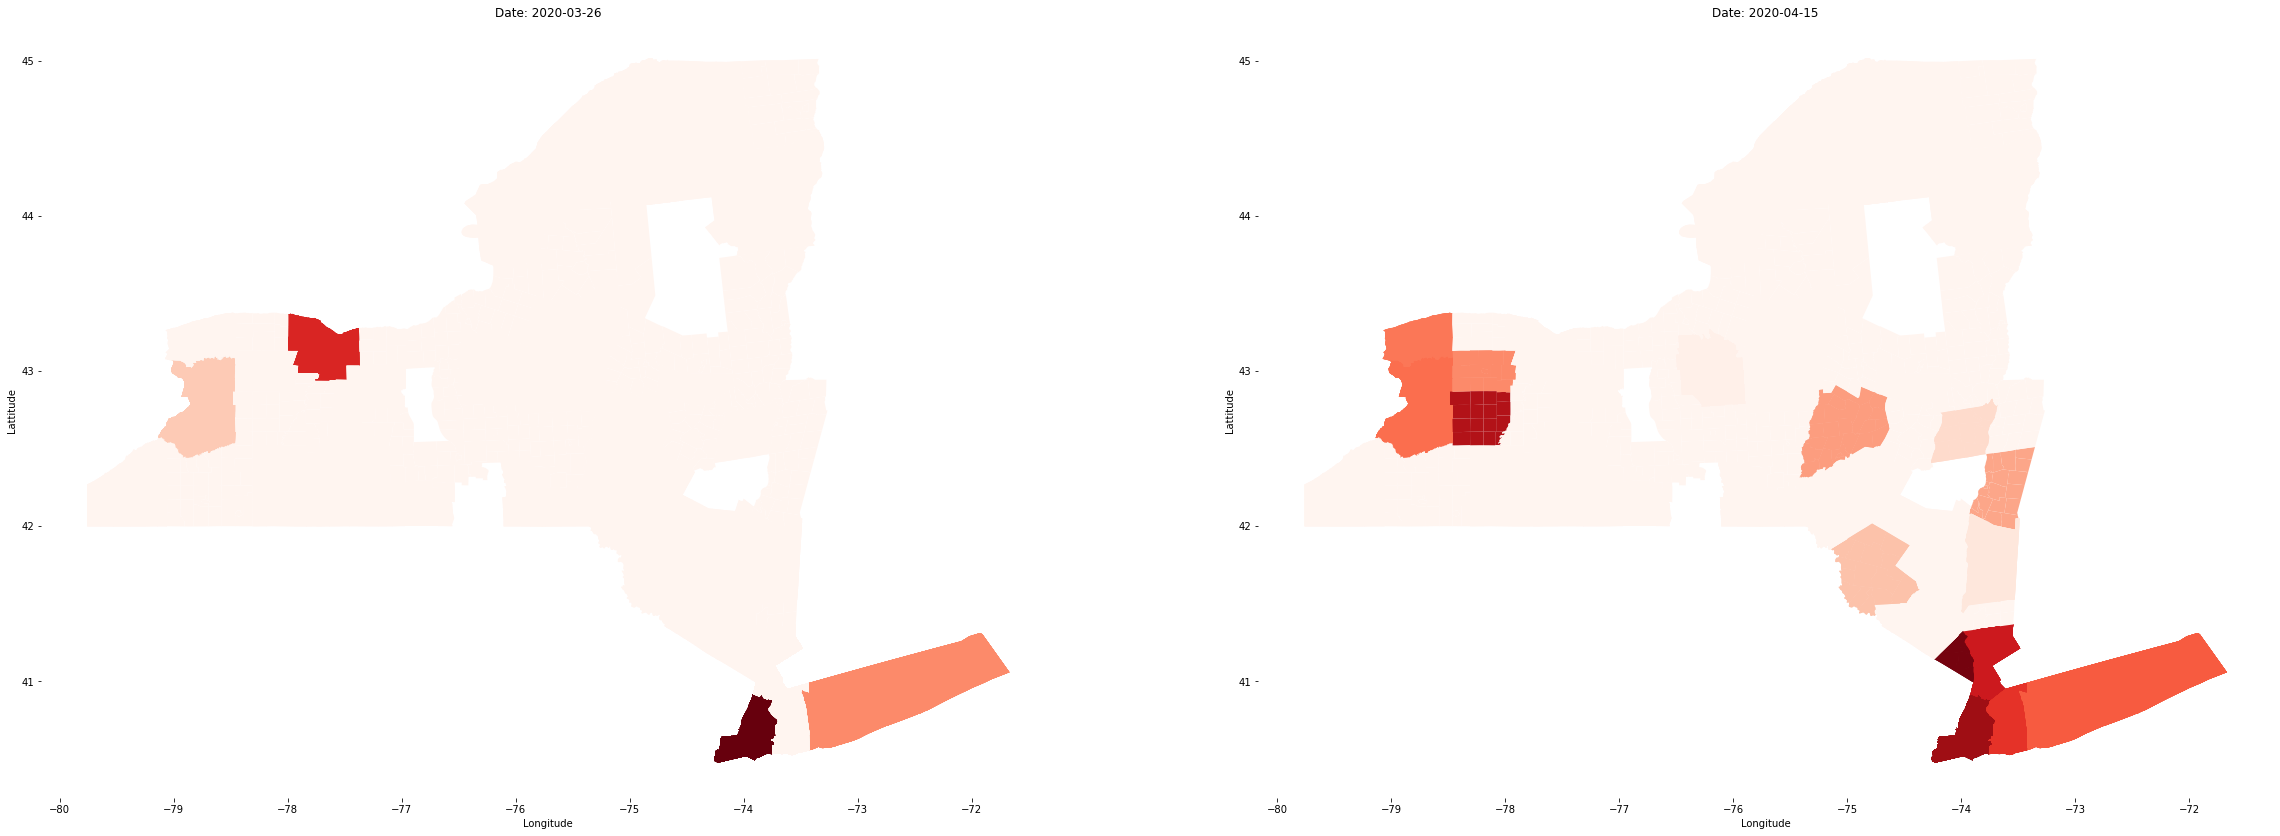

In [37]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-03-26',ax1),('2020-04-15',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_deaths_by_pop', ax=ax, fig=fig, title="Date: "+date)

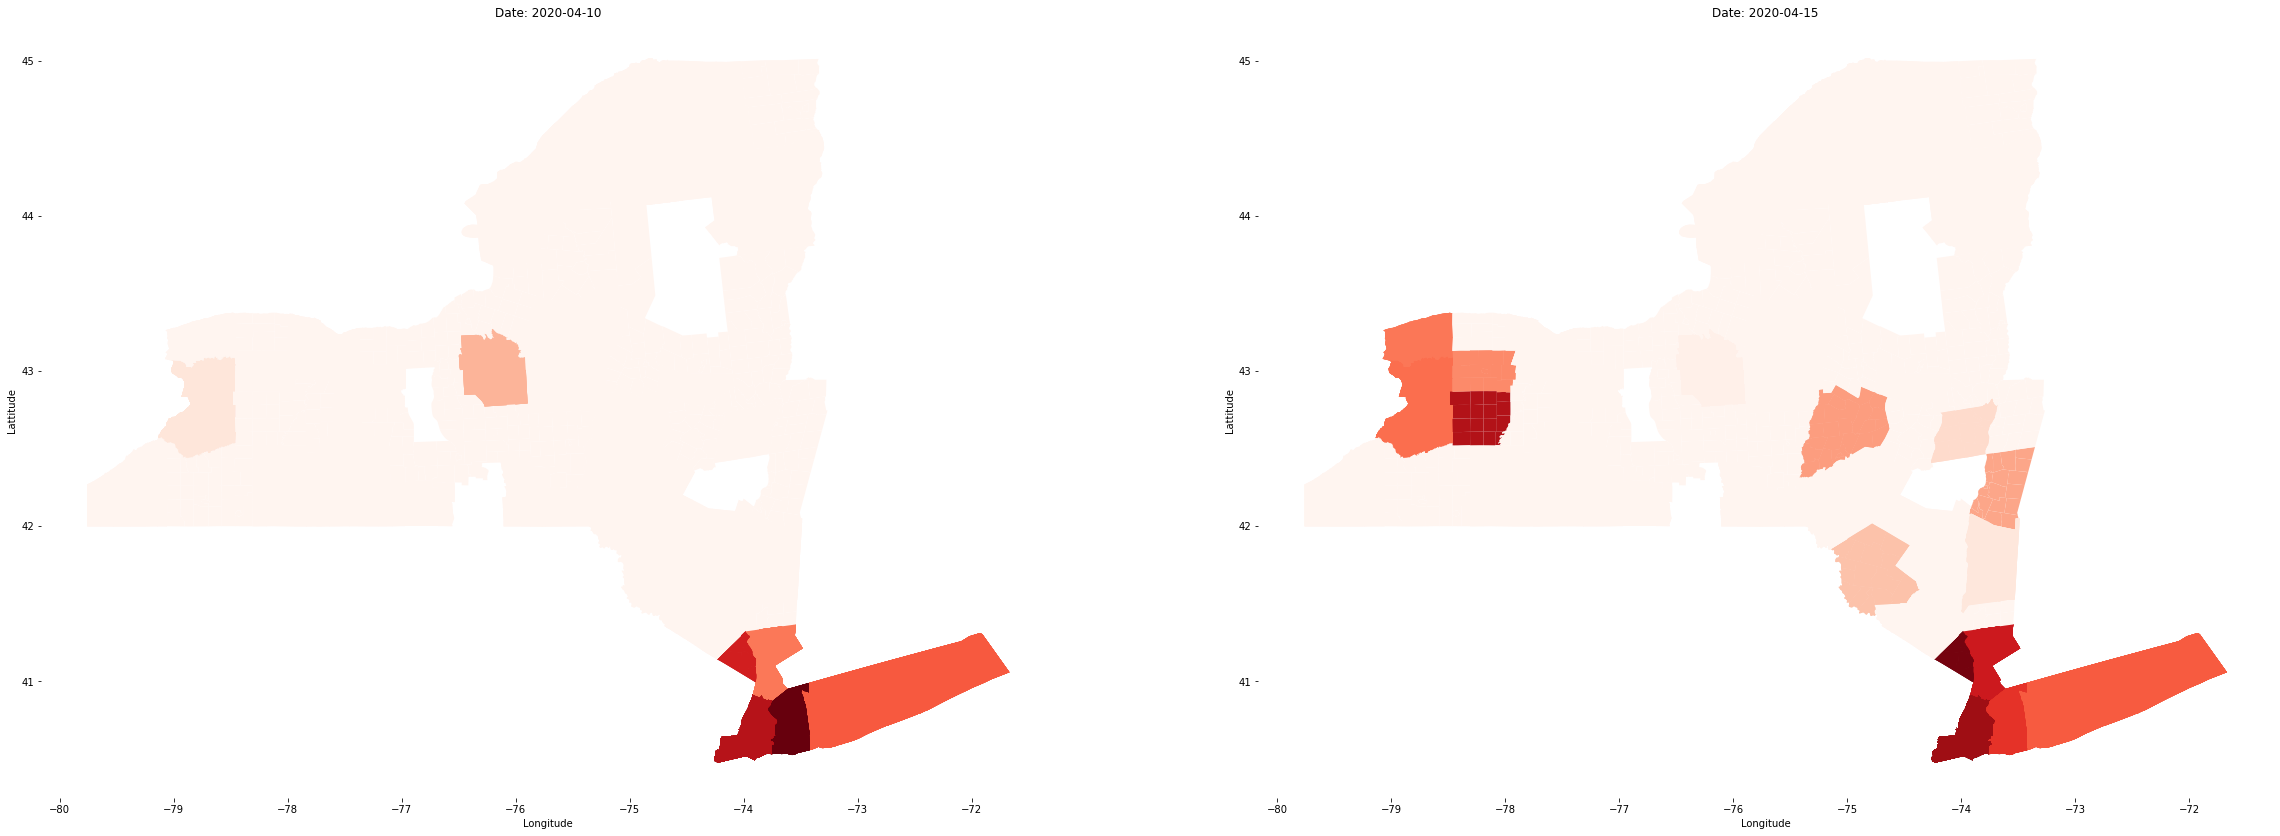

In [19]:
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-04-10',ax1),('2020-04-15',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_deaths_by_pop', ax=ax, fig=fig, title="Date: "+date)


**During the summer of 2020 , second wave were in the southern parts of the country.**

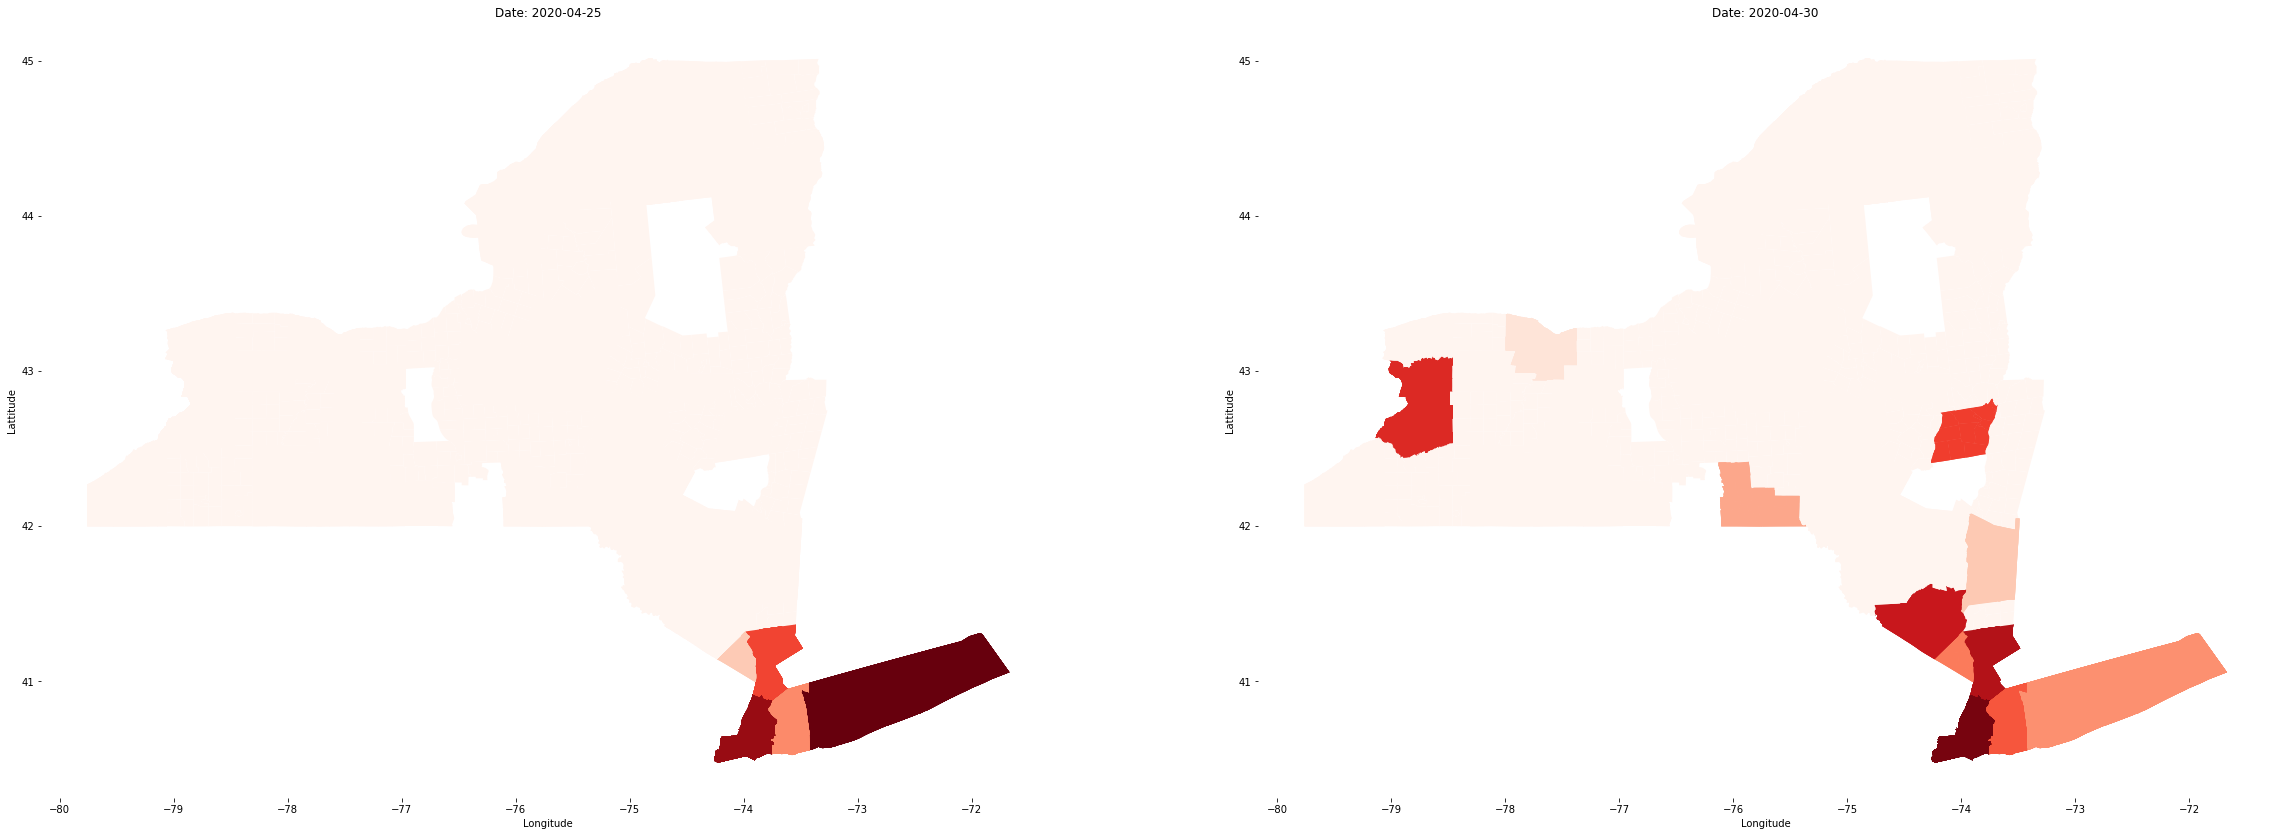

In [20]:
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-04-25',ax1),('2020-04-30',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_deaths_by_pop', ax=ax, fig=fig, title="Date: "+date)


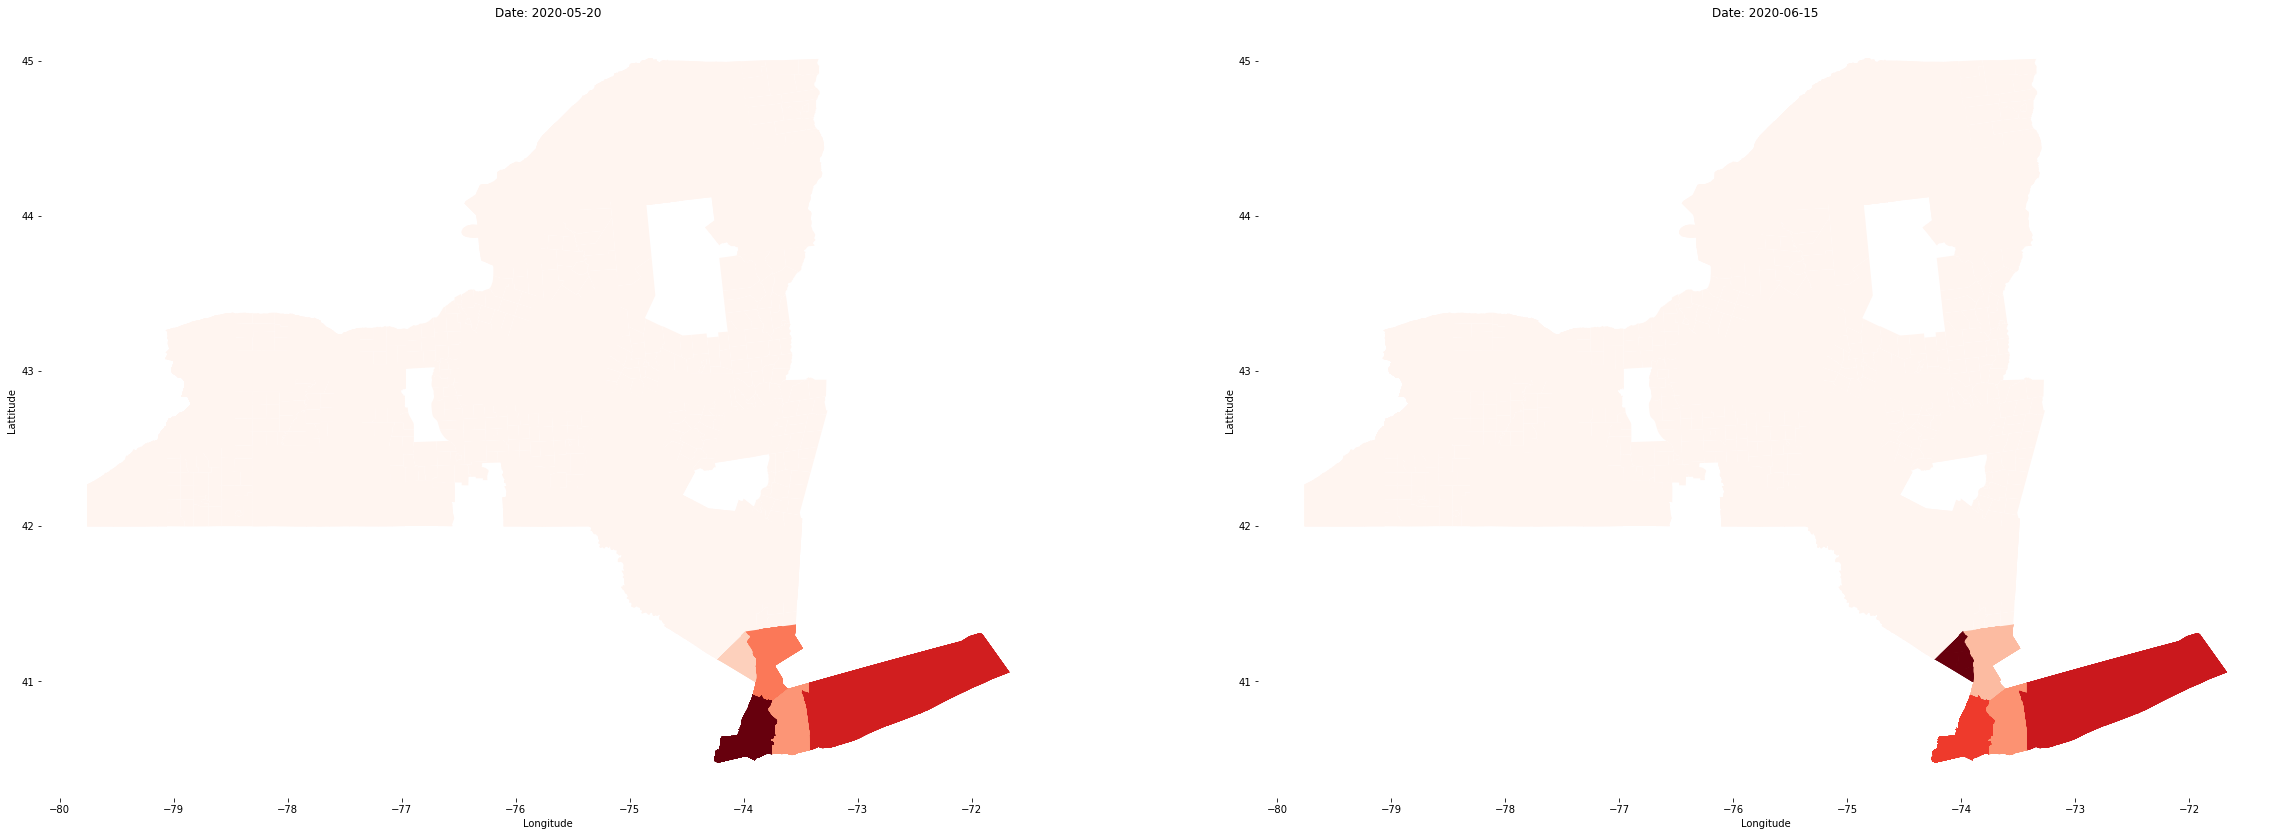

In [21]:
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-05-20',ax1),('2020-06-15',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_deaths_by_pop', ax=ax, fig=fig, title="Date: "+date)


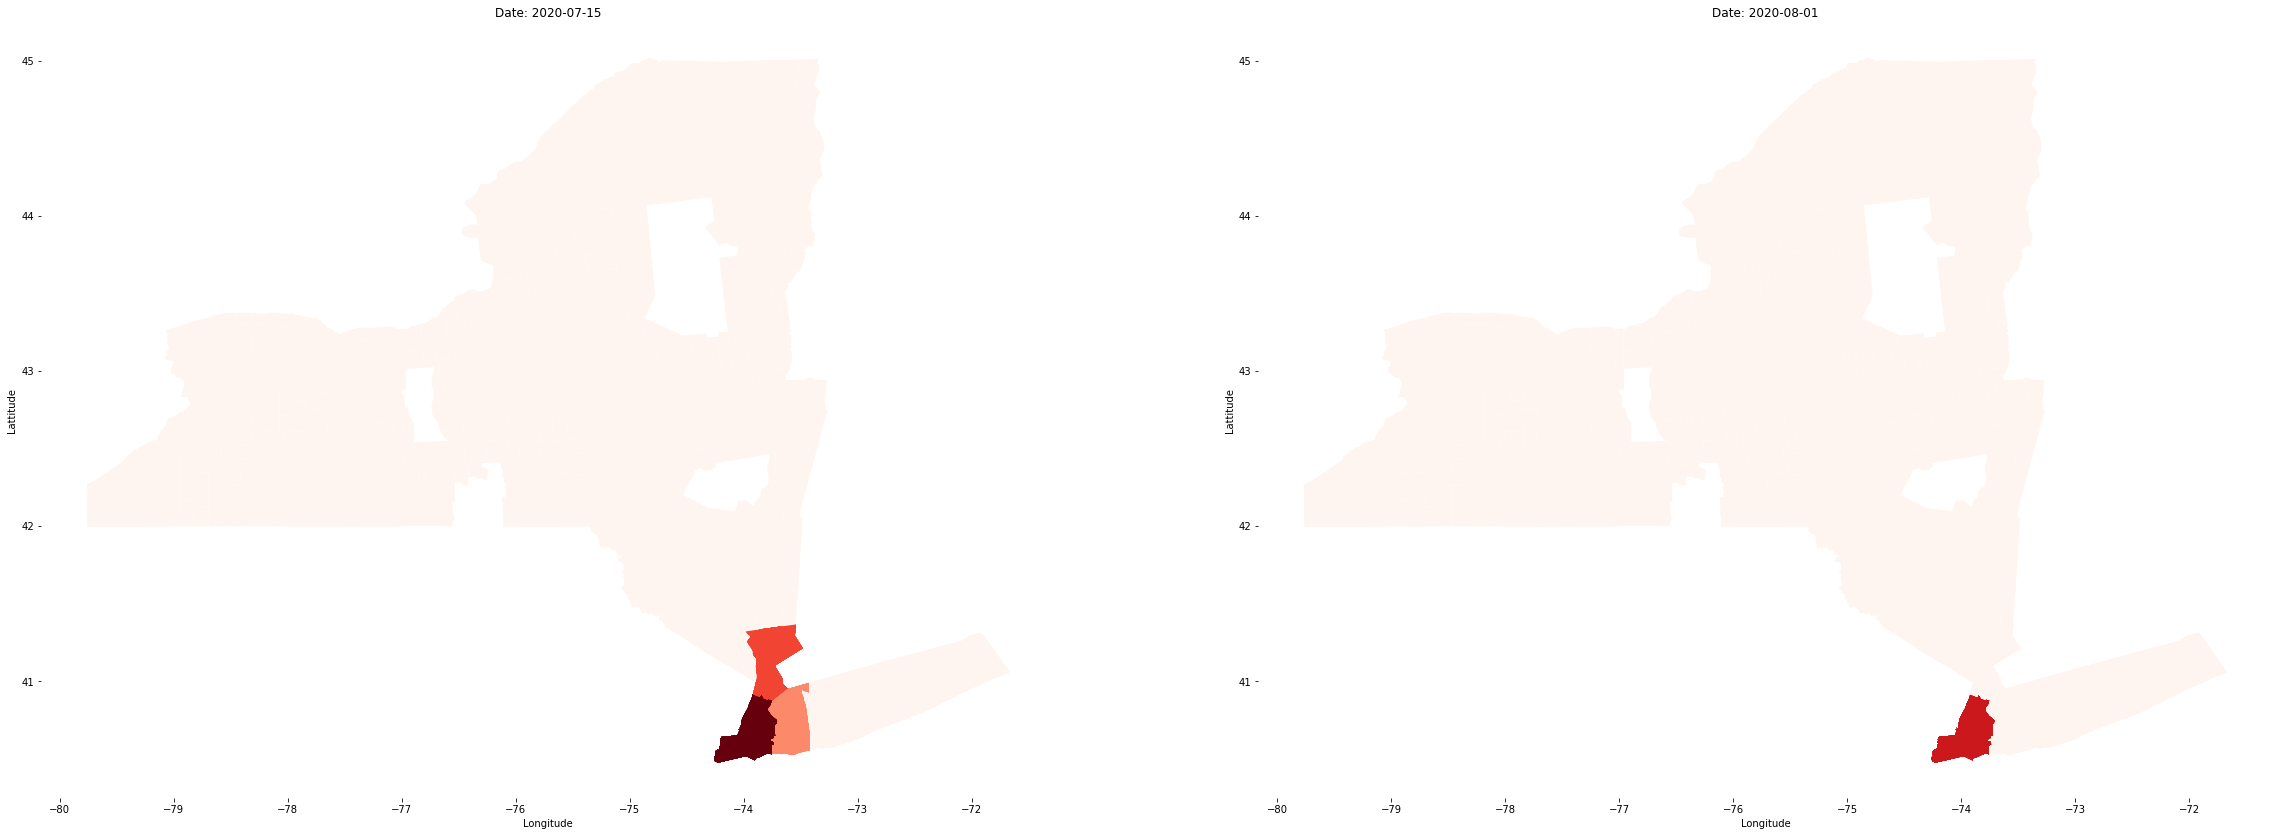

In [22]:
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-07-15',ax1),('2020-08-01',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_deaths_by_pop', ax=ax, fig=fig, title="Date: "+date)

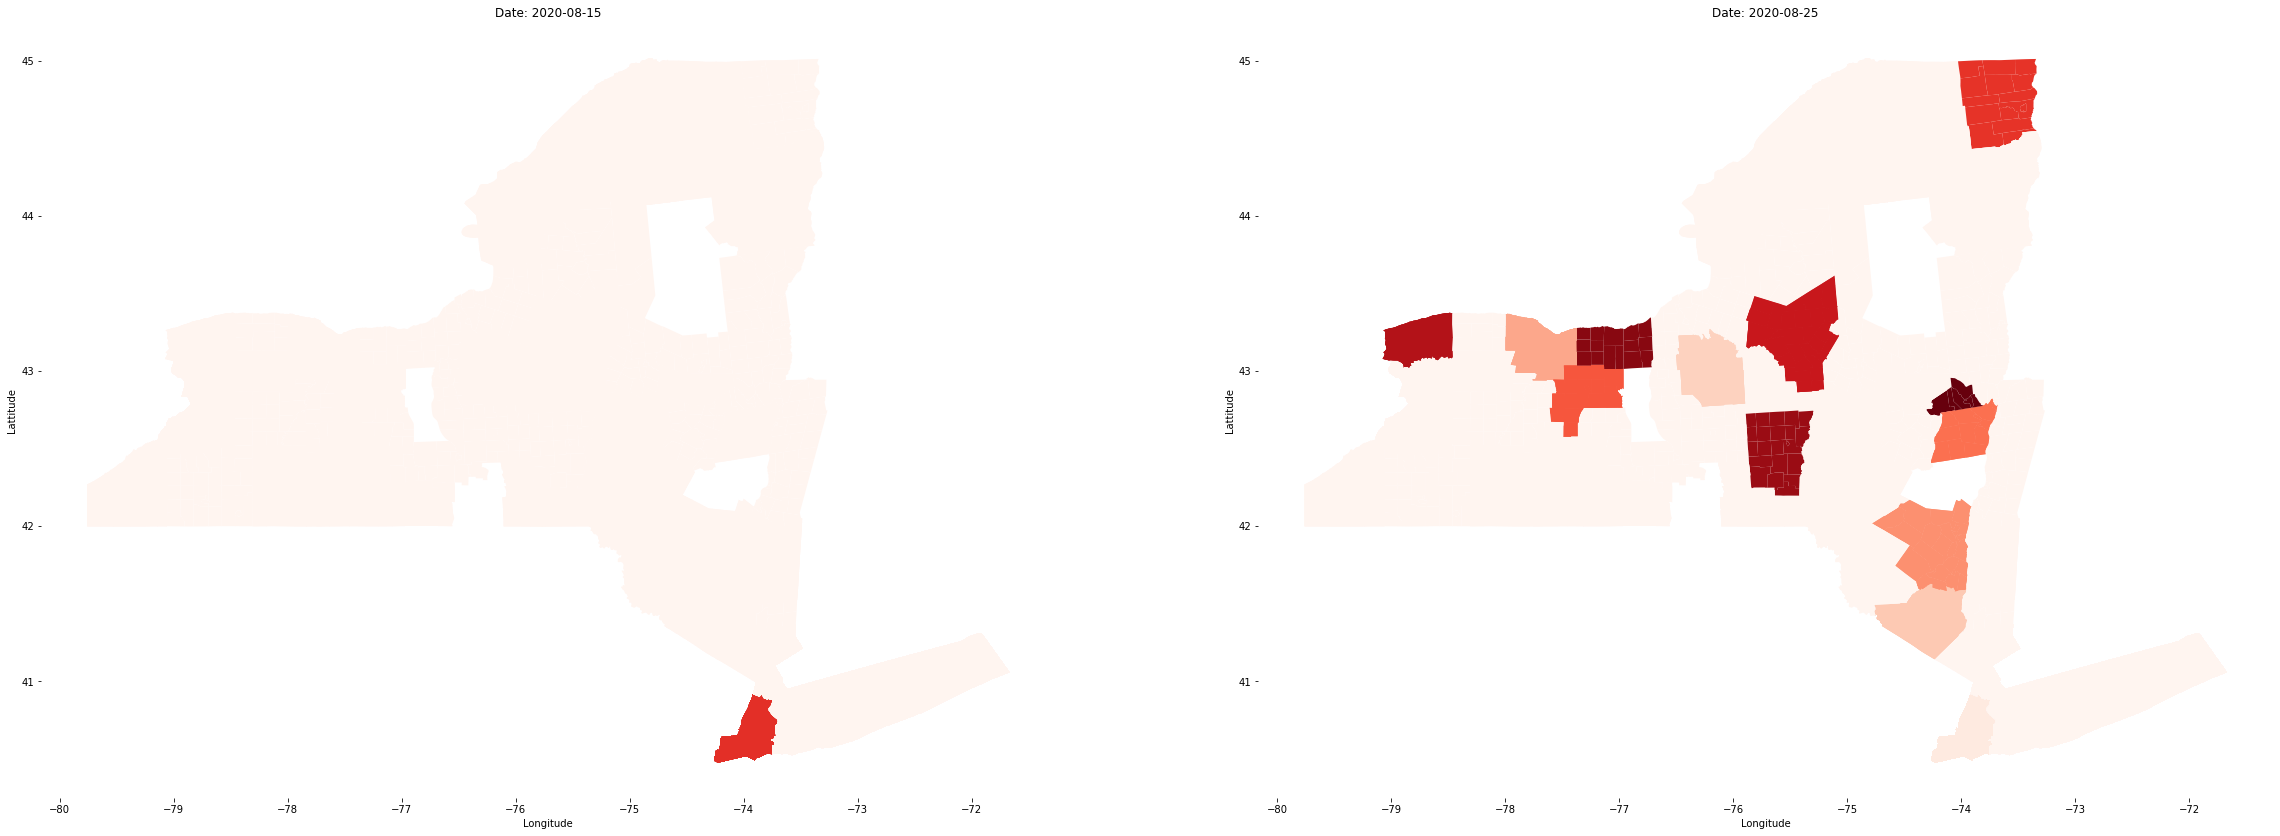

In [23]:
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-08-15',ax1),('2020-08-25',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_deaths_by_pop', ax=ax, fig=fig, title="Date: "+date)

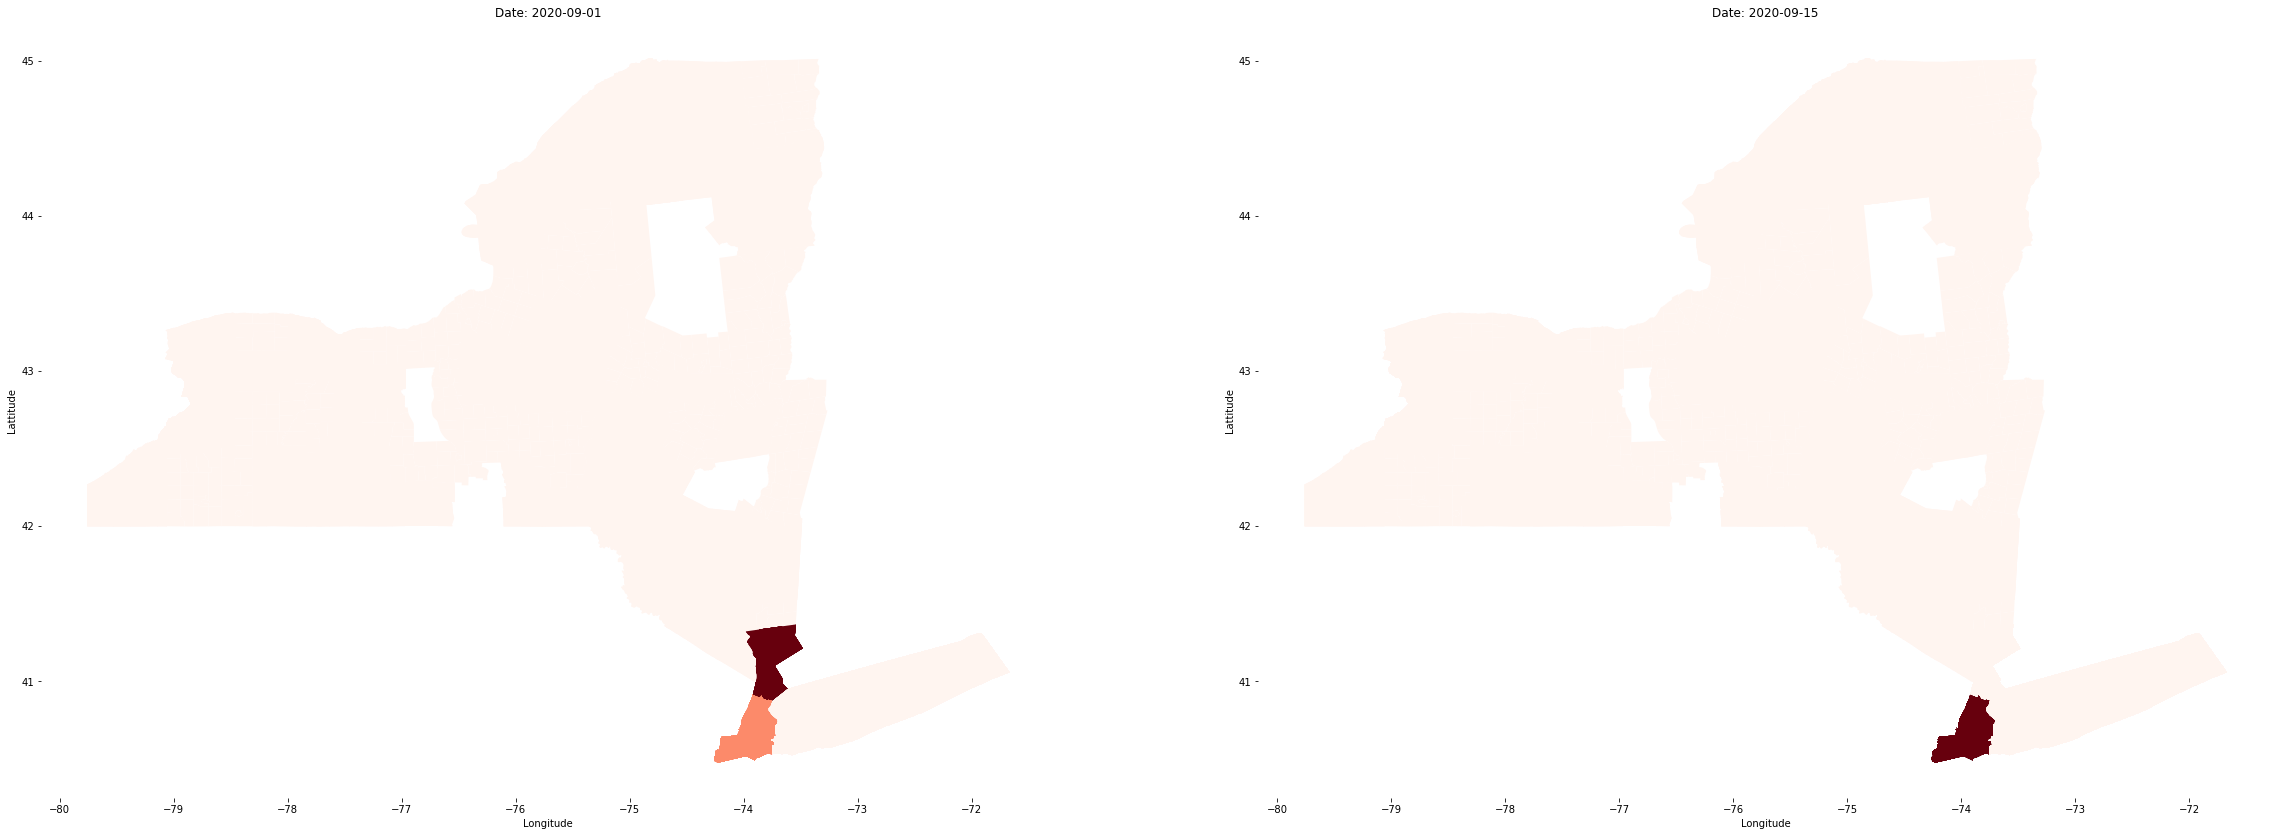

In [24]:
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-09-01',ax1),('2020-09-15',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_deaths_by_pop', ax=ax, fig=fig, title="Date: "+date)

The geographic distinctions that characterized the earlier waves became much less pronounced and Deaths has spread in every county
COVID-19 initially ravaged the most densely populated parts of the U.S., but that
pattern has changed substantially over the past two years.

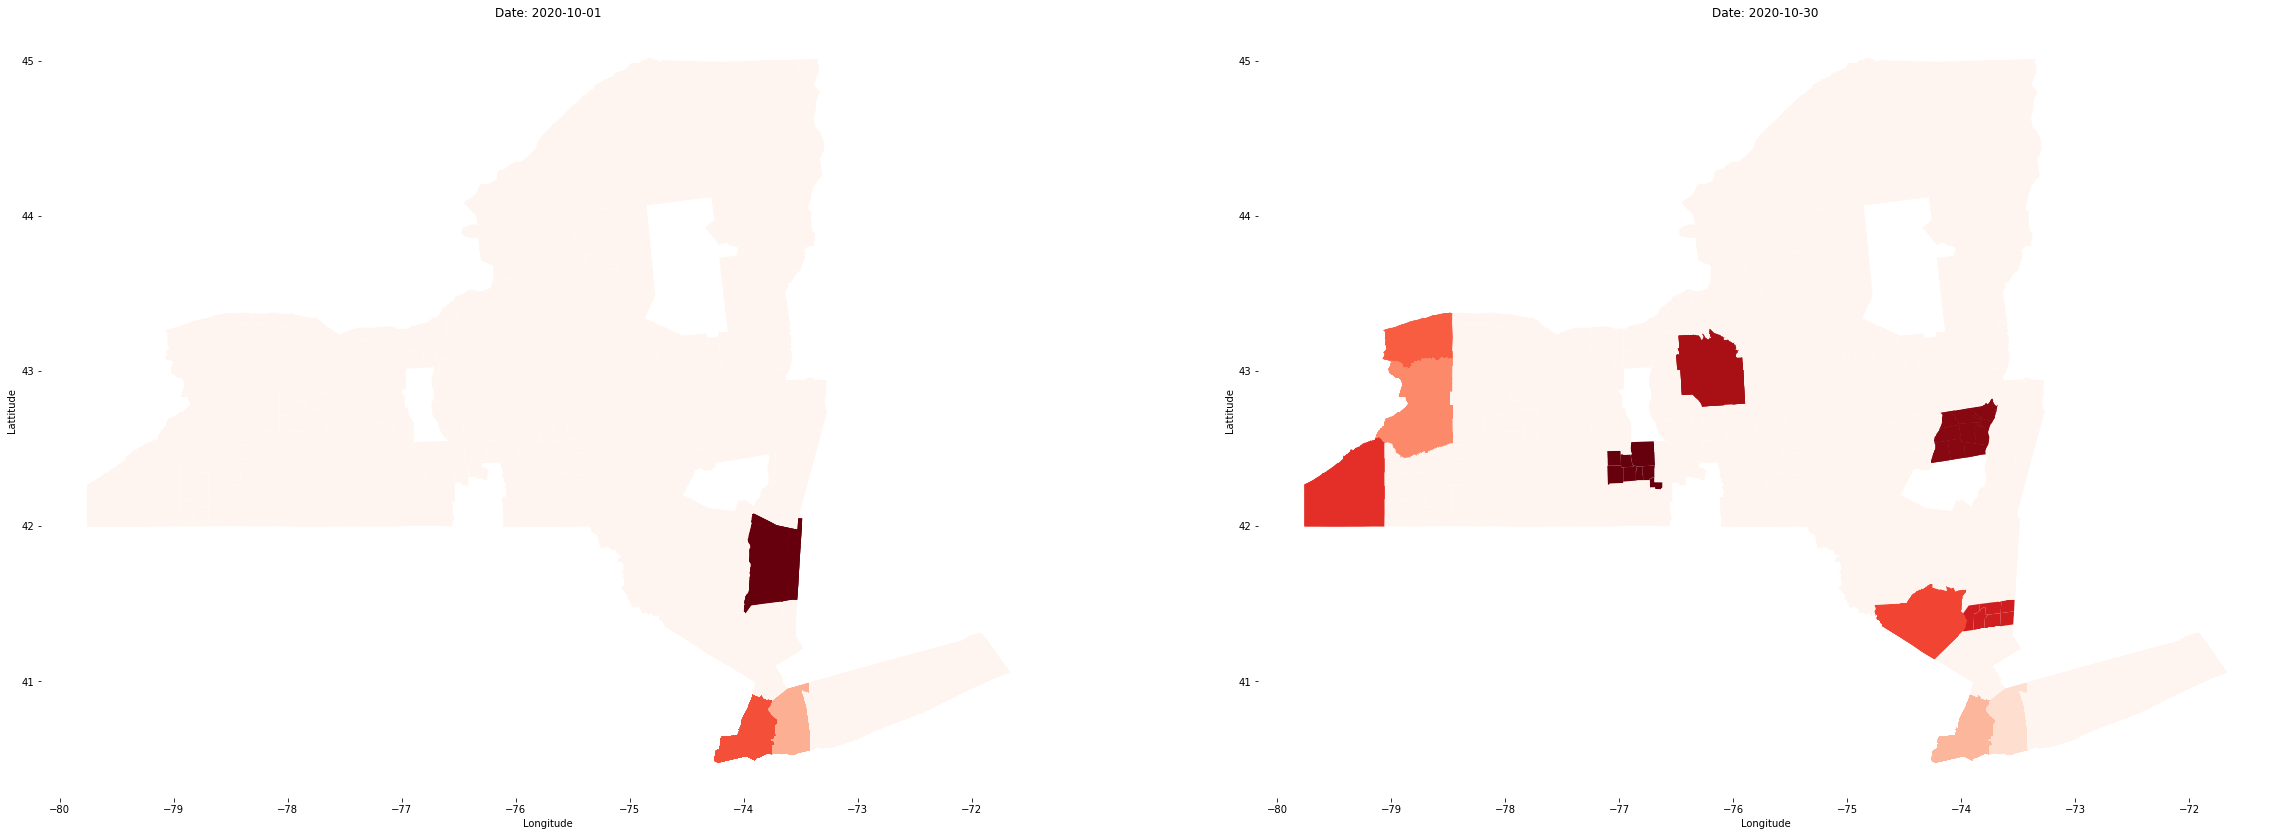

In [25]:
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-10-01',ax1),('2020-10-30',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_deaths_by_pop', ax=ax, fig=fig, title="Date: "+date)

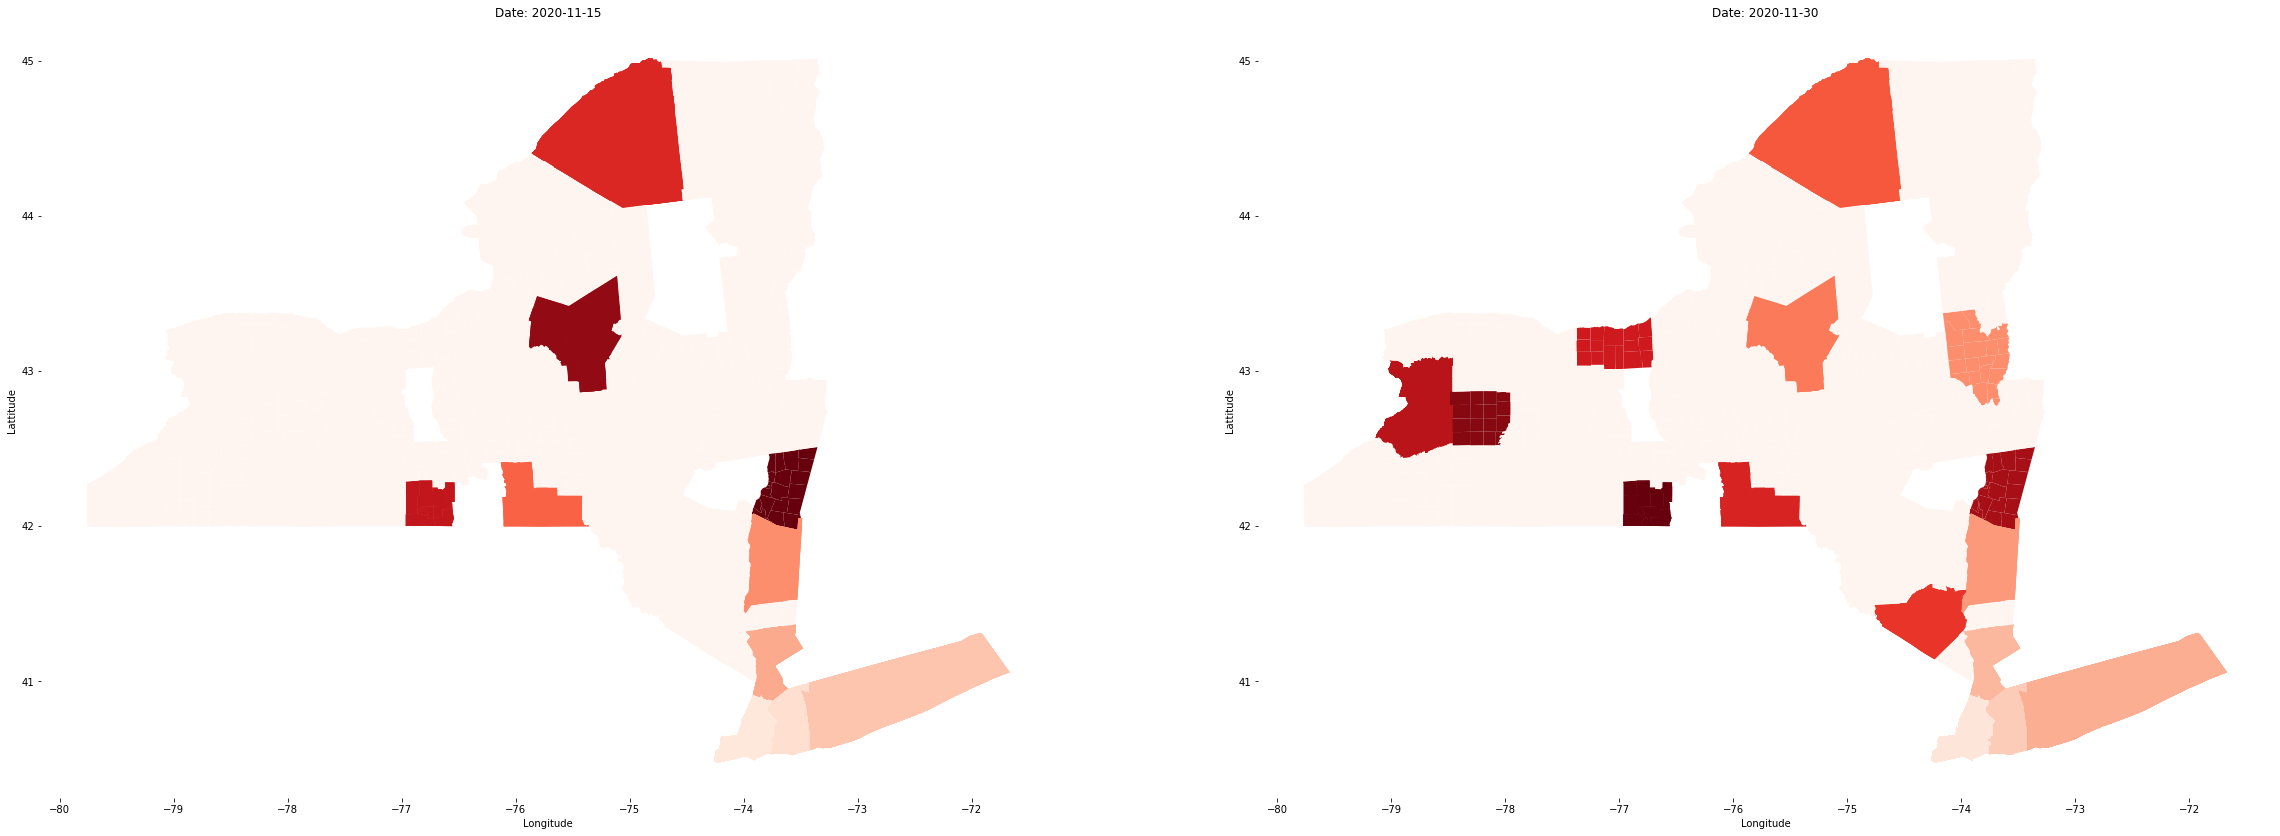

In [26]:
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-11-15',ax1),('2020-11-30',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_deaths_by_pop', ax=ax, fig=fig, title="Date: "+date)

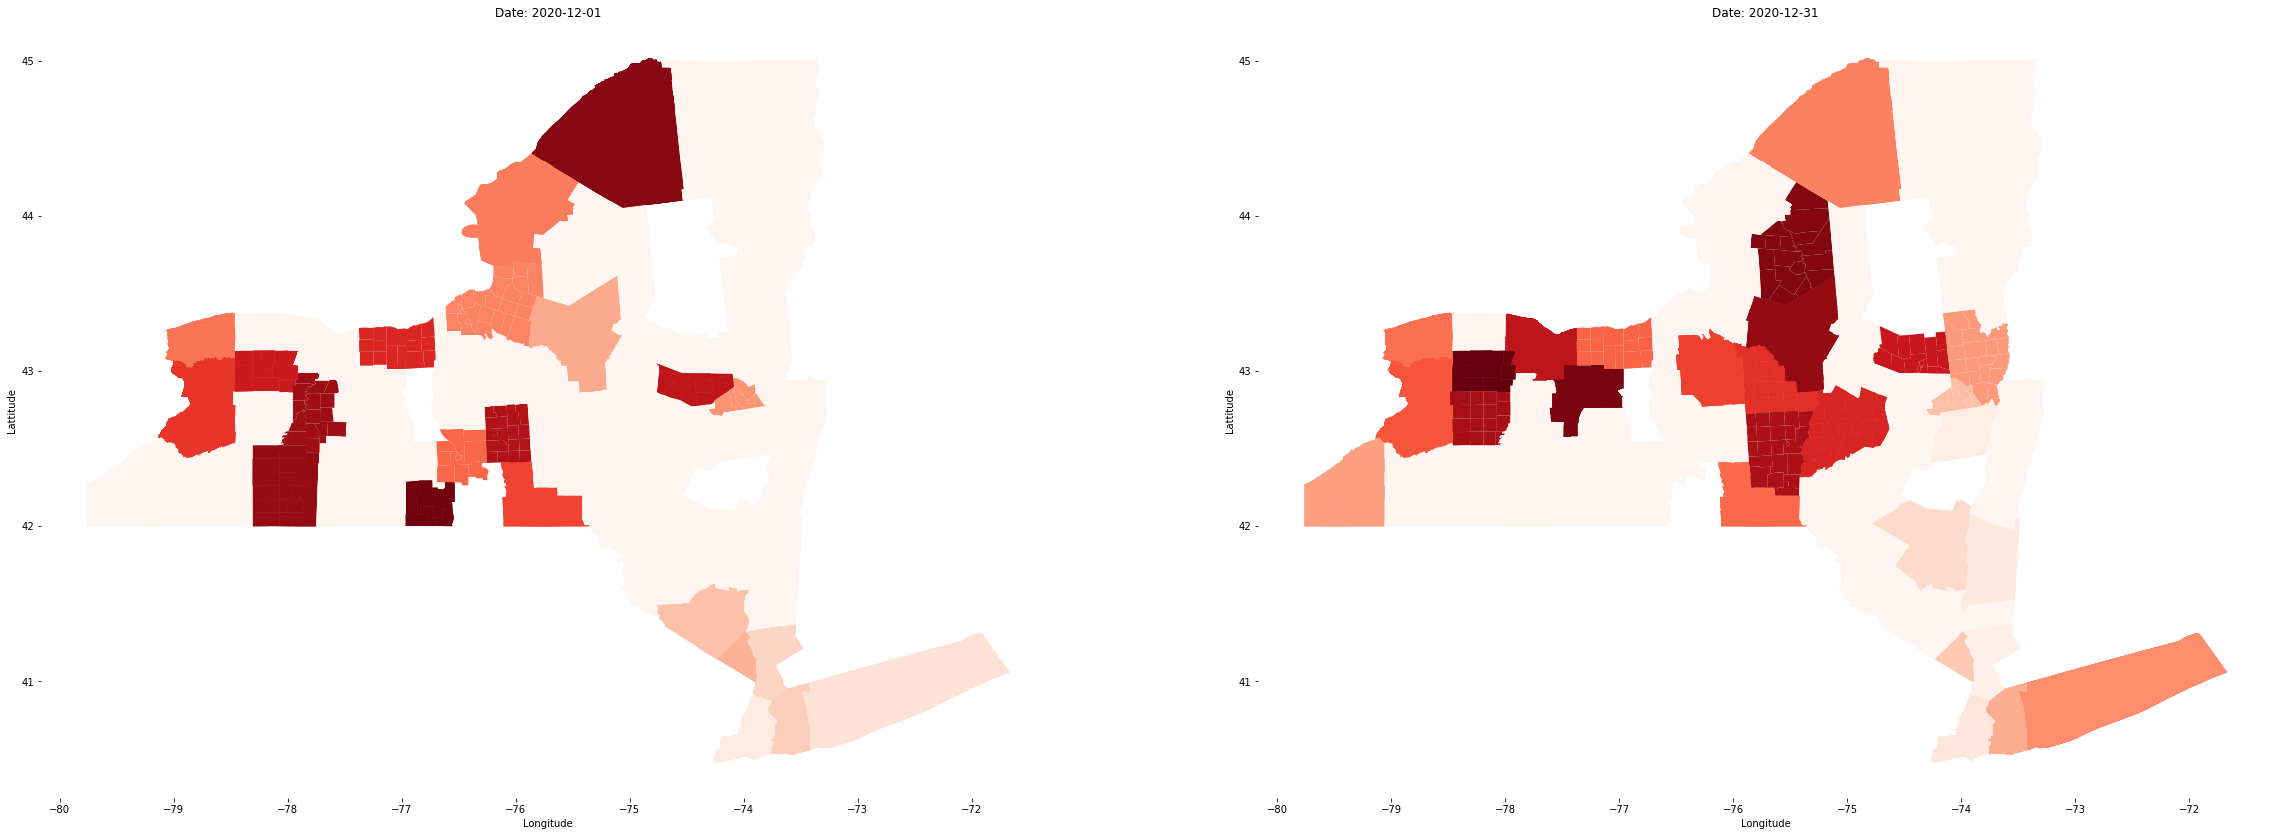

In [27]:
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-12-01',ax1),('2020-12-31',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_deaths_by_pop', ax=ax, fig=fig, title="Date: "+date)

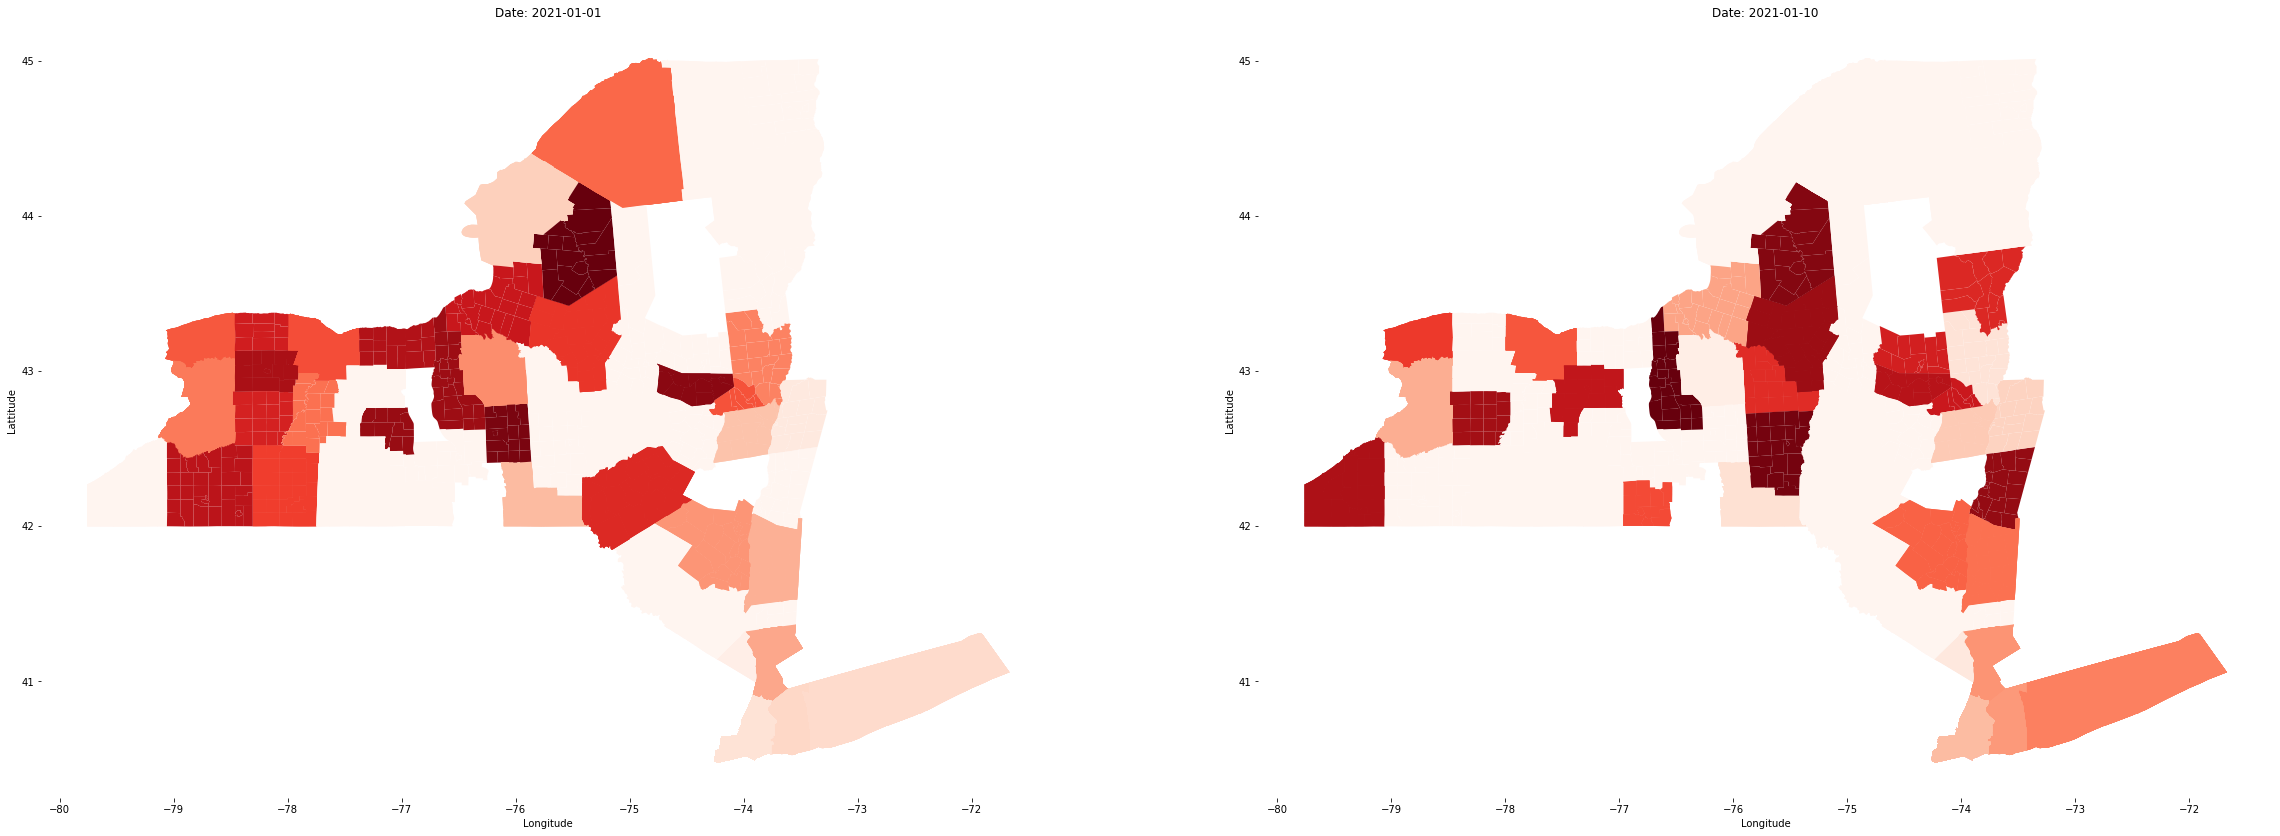

In [28]:
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-01-01',ax1),('2021-01-10',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_deaths_by_pop', ax=ax, fig=fig, title="Date: "+date)

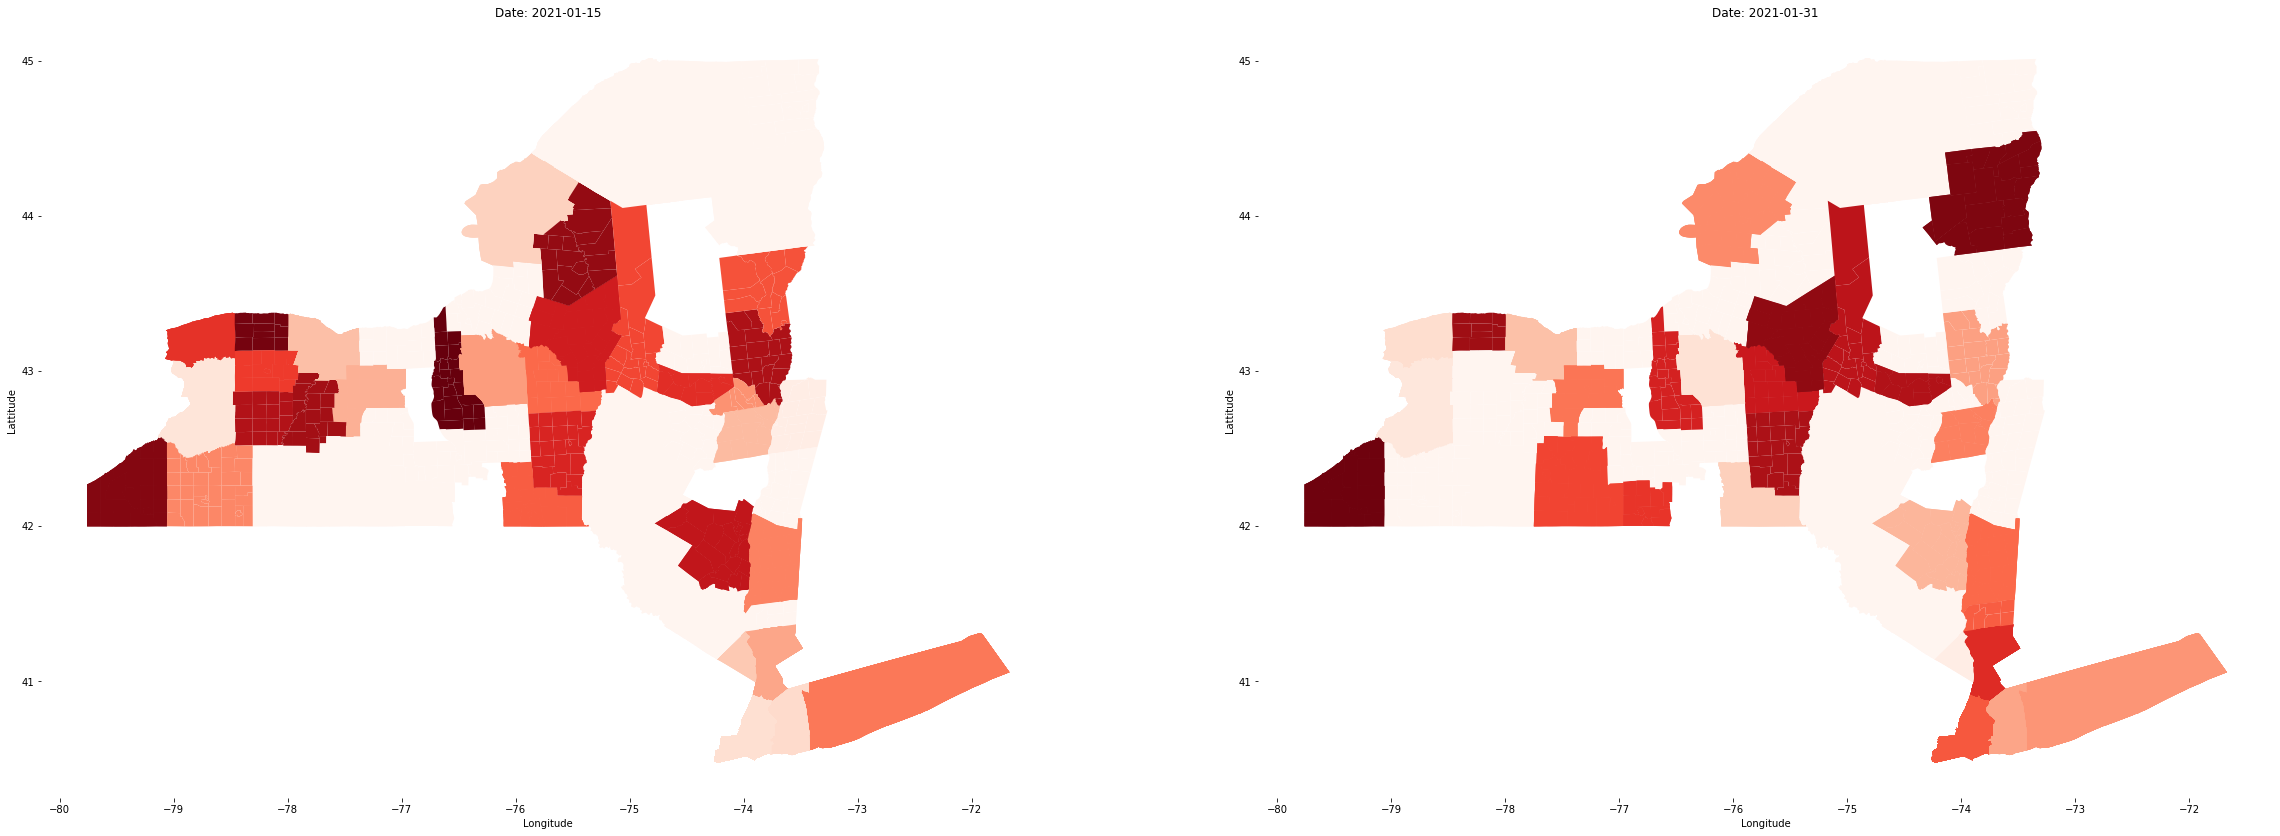

In [29]:
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-01-15',ax1),('2021-01-31',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_deaths_by_pop', ax=ax, fig=fig, title="Date: "+date)

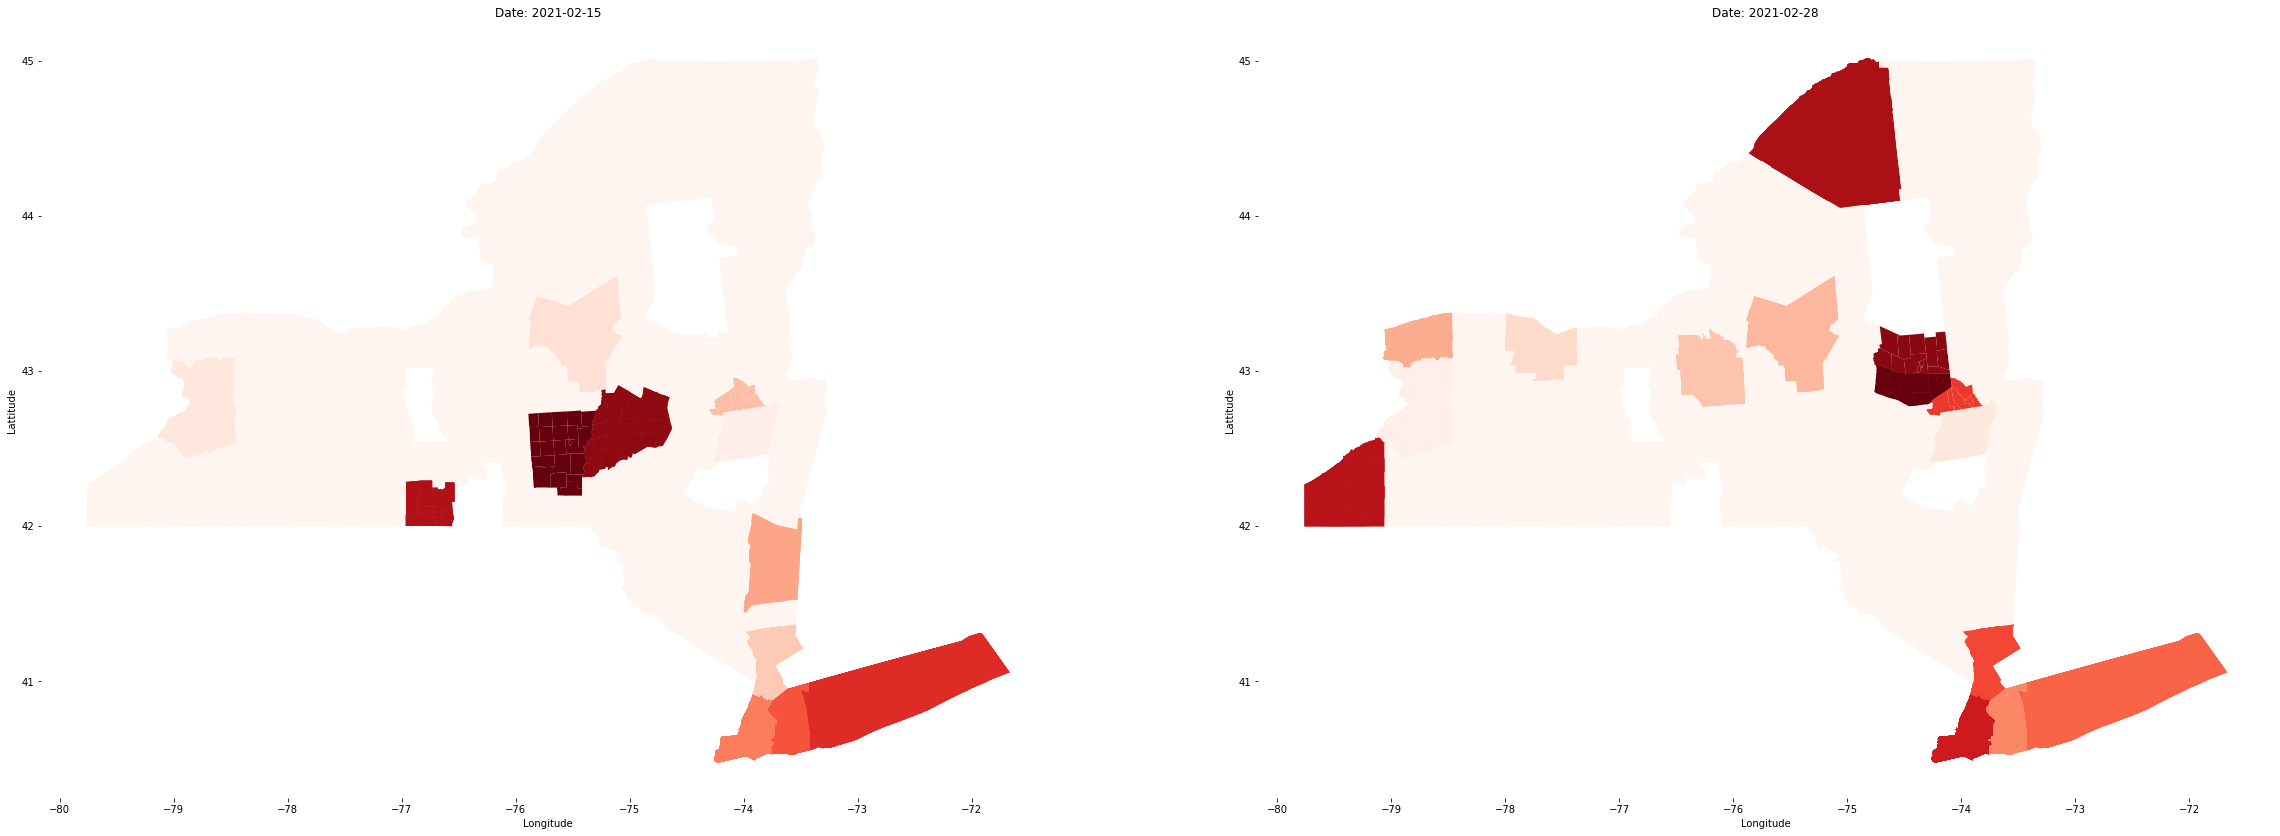

In [30]:
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-02-15',ax1),('2021-02-28',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_deaths_by_pop', ax=ax, fig=fig, title="Date: "+date)

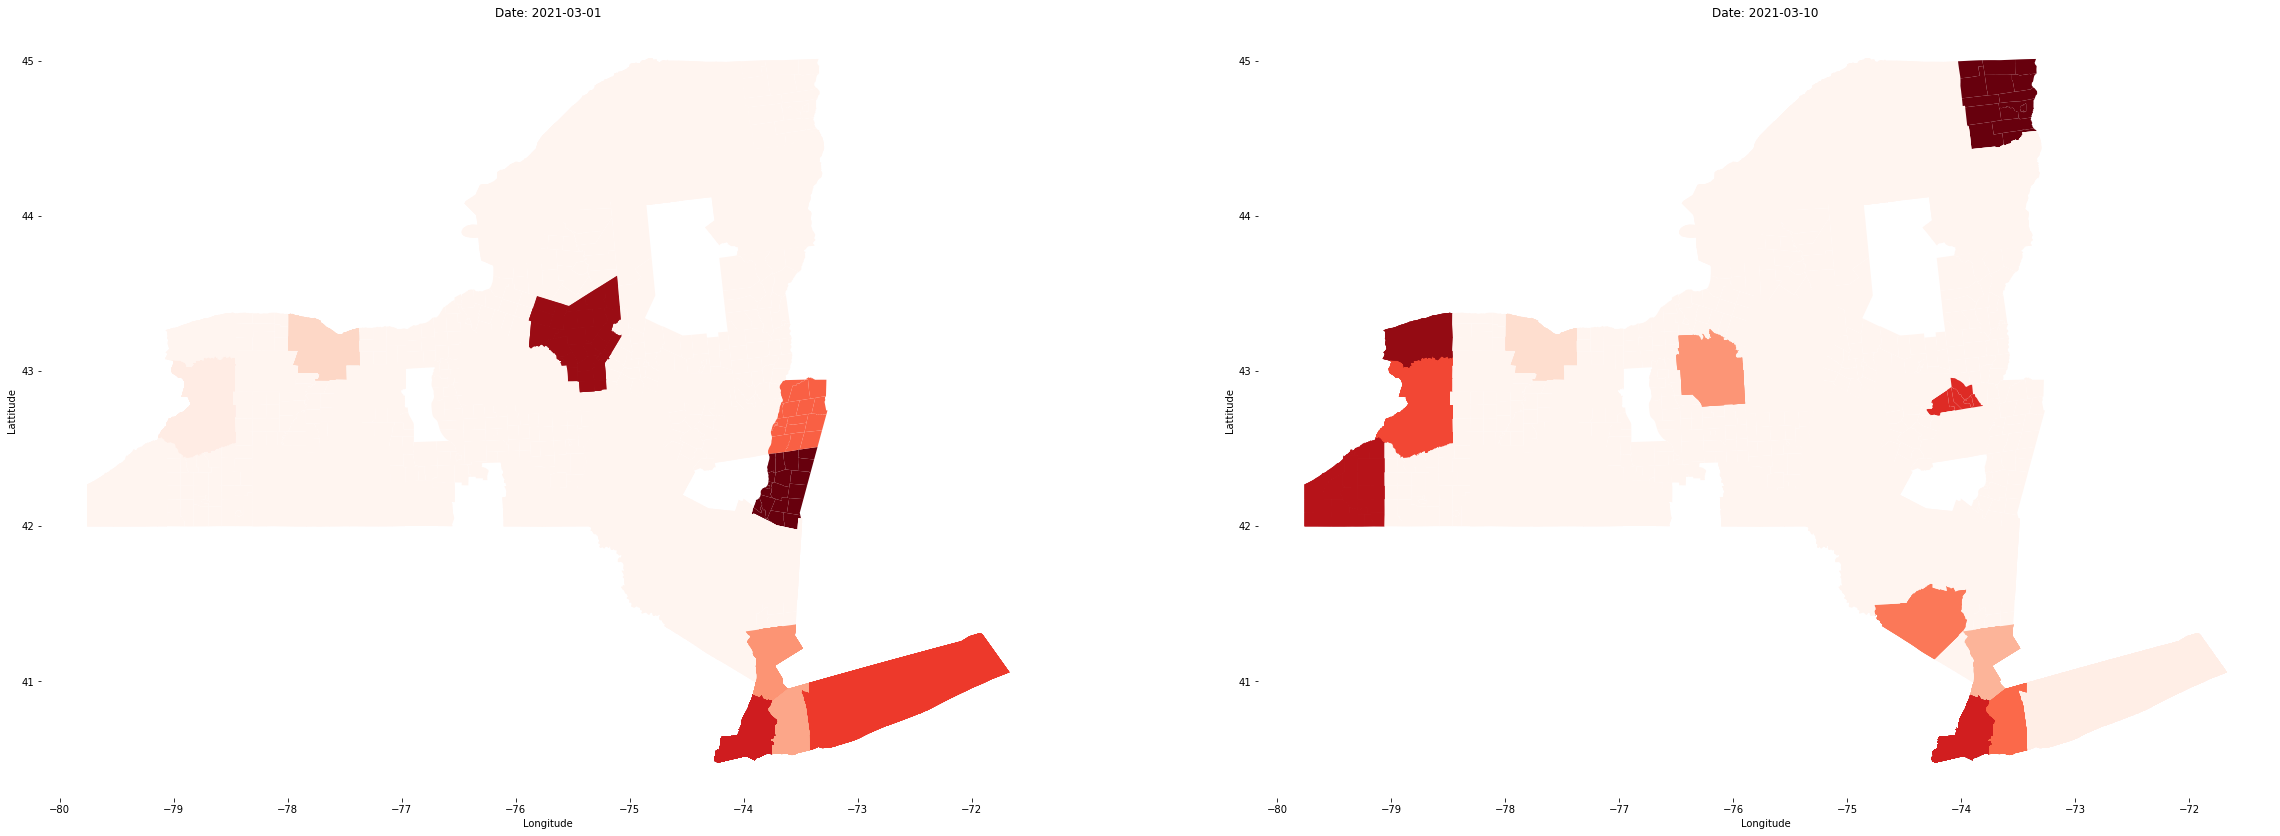

In [31]:
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-03-01',ax1),('2021-03-10',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_deaths_by_pop', ax=ax, fig=fig, title="Date: "+date)

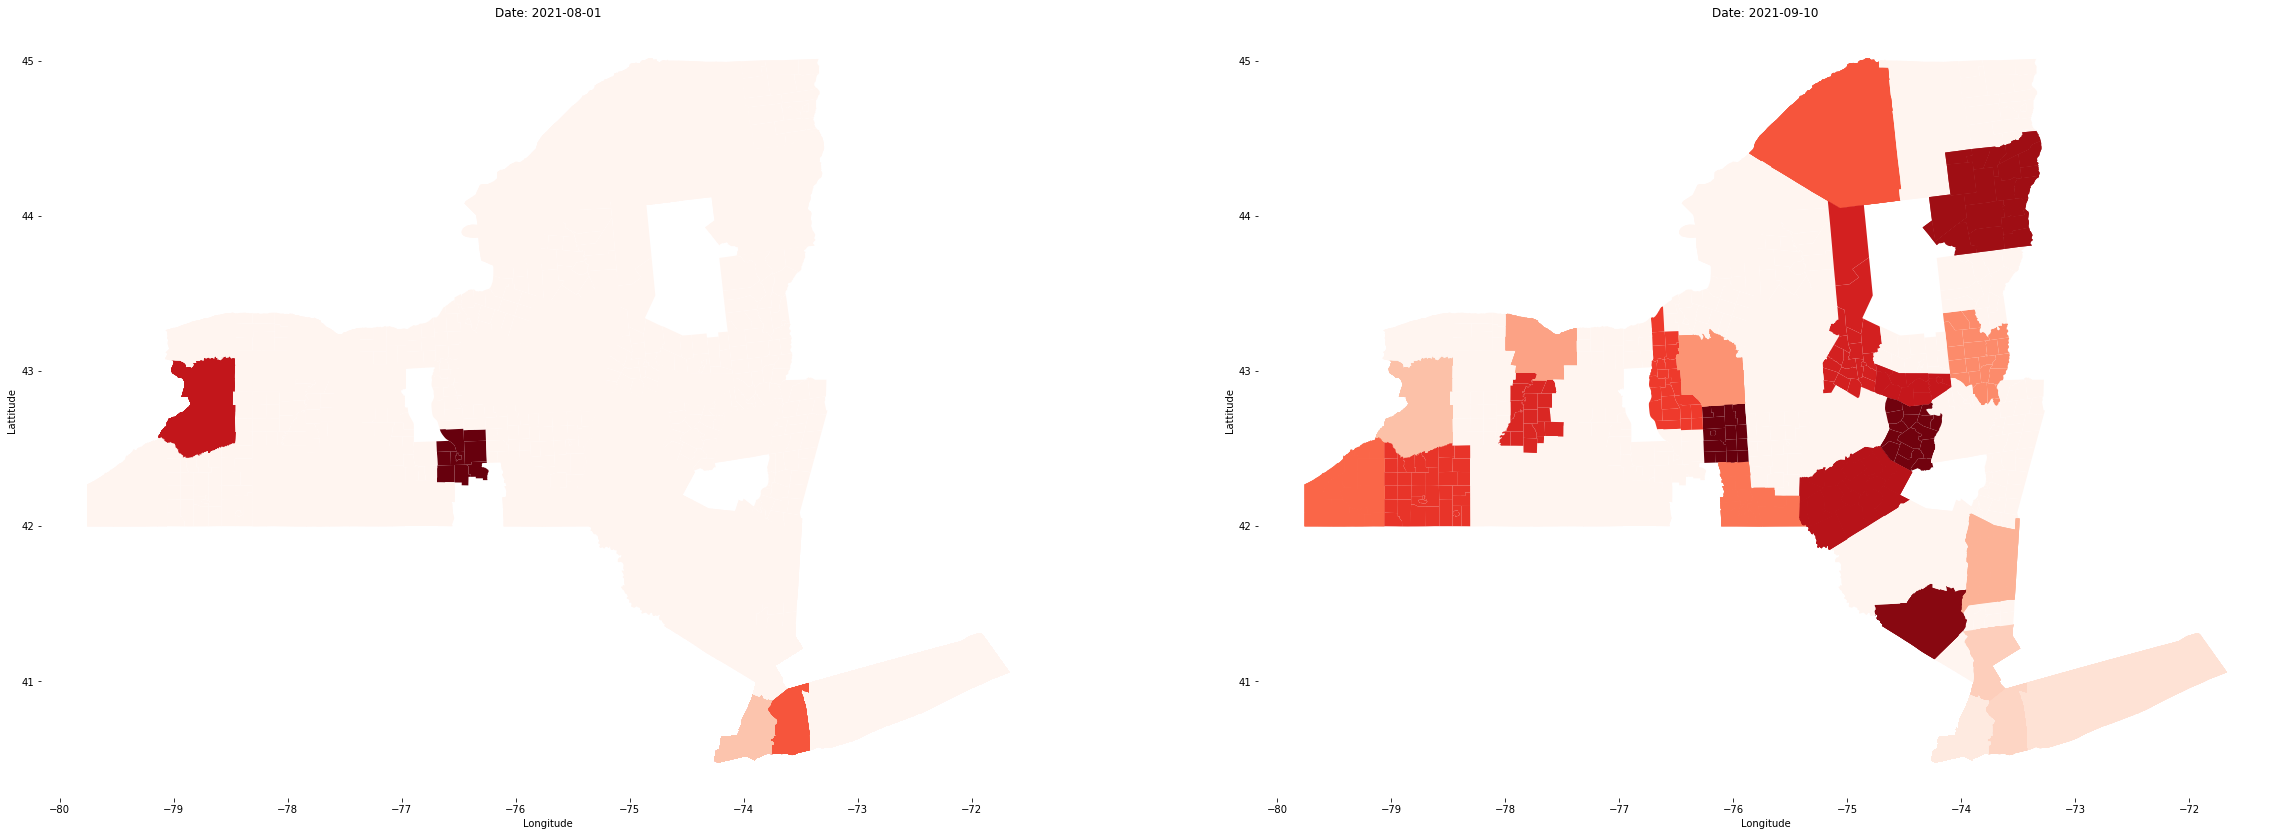

In [32]:
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-08-01',ax1),('2021-09-10',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_deaths_by_pop', ax=ax, fig=fig, title="Date: "+date)

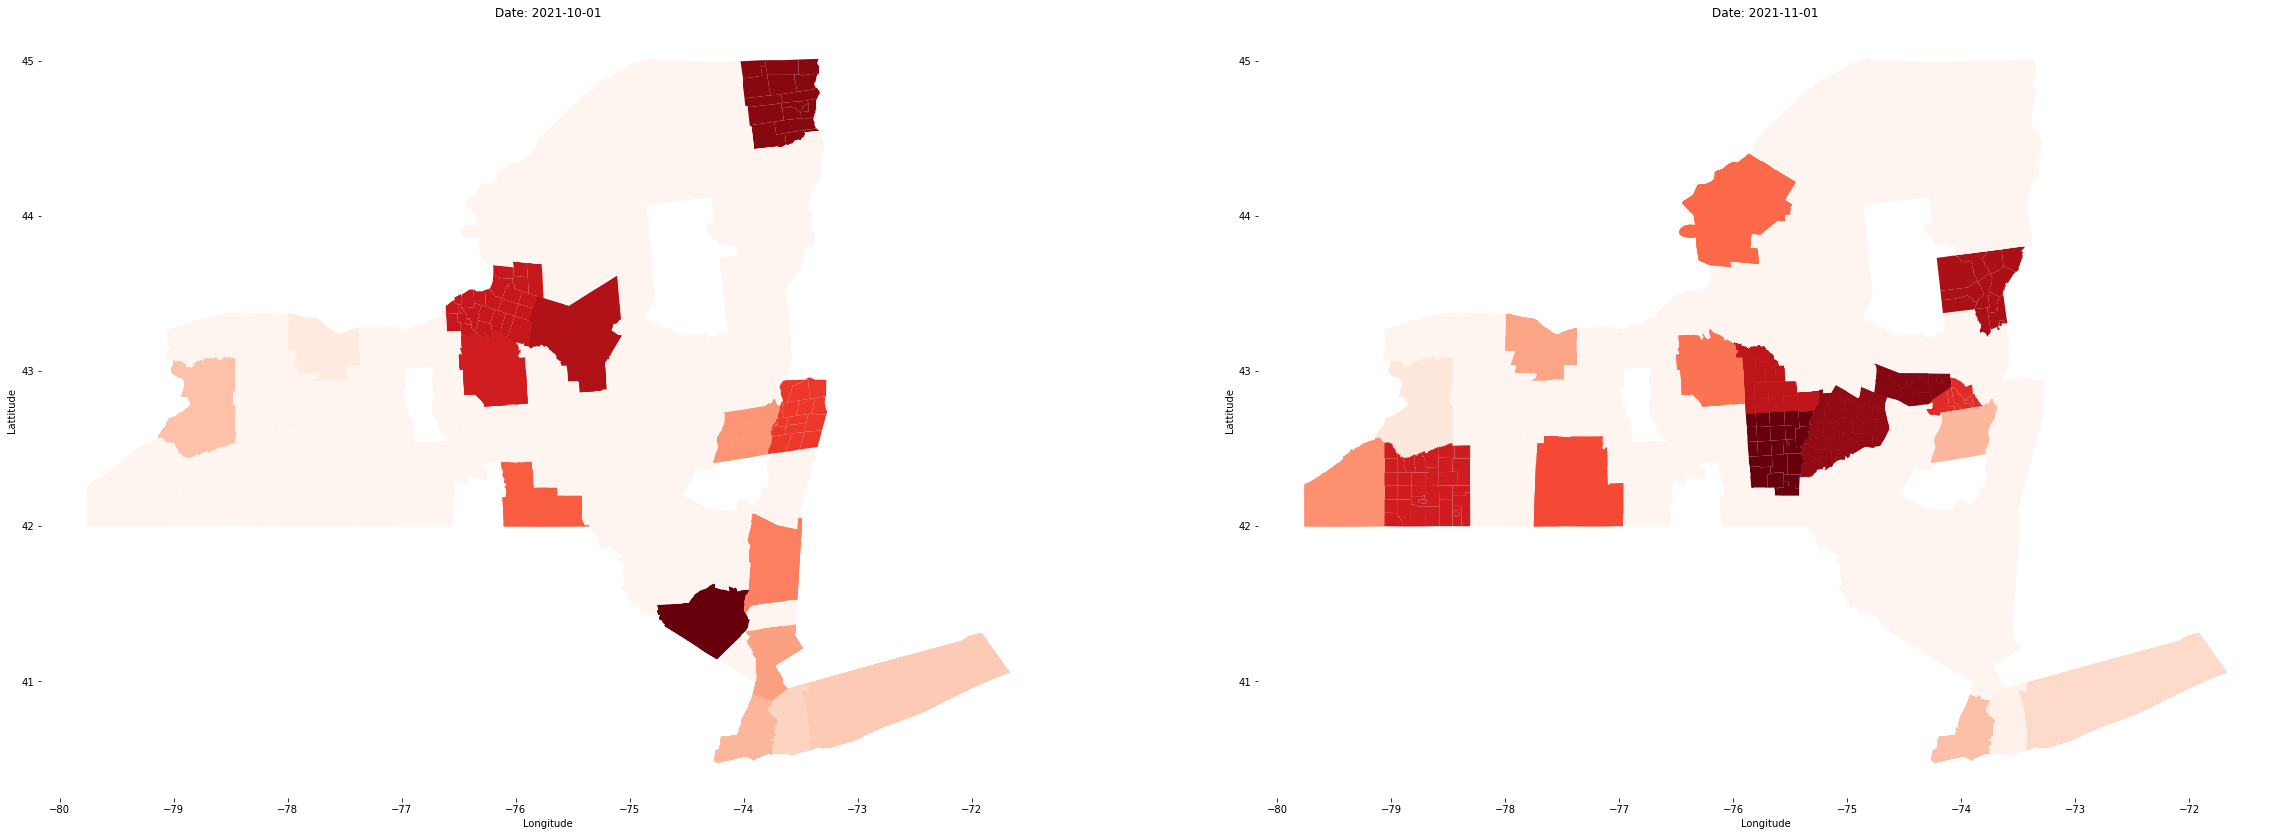

In [33]:
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-10-01',ax1),('2021-11-01',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_deaths_by_pop', ax=ax, fig=fig, title="Date: "+date)

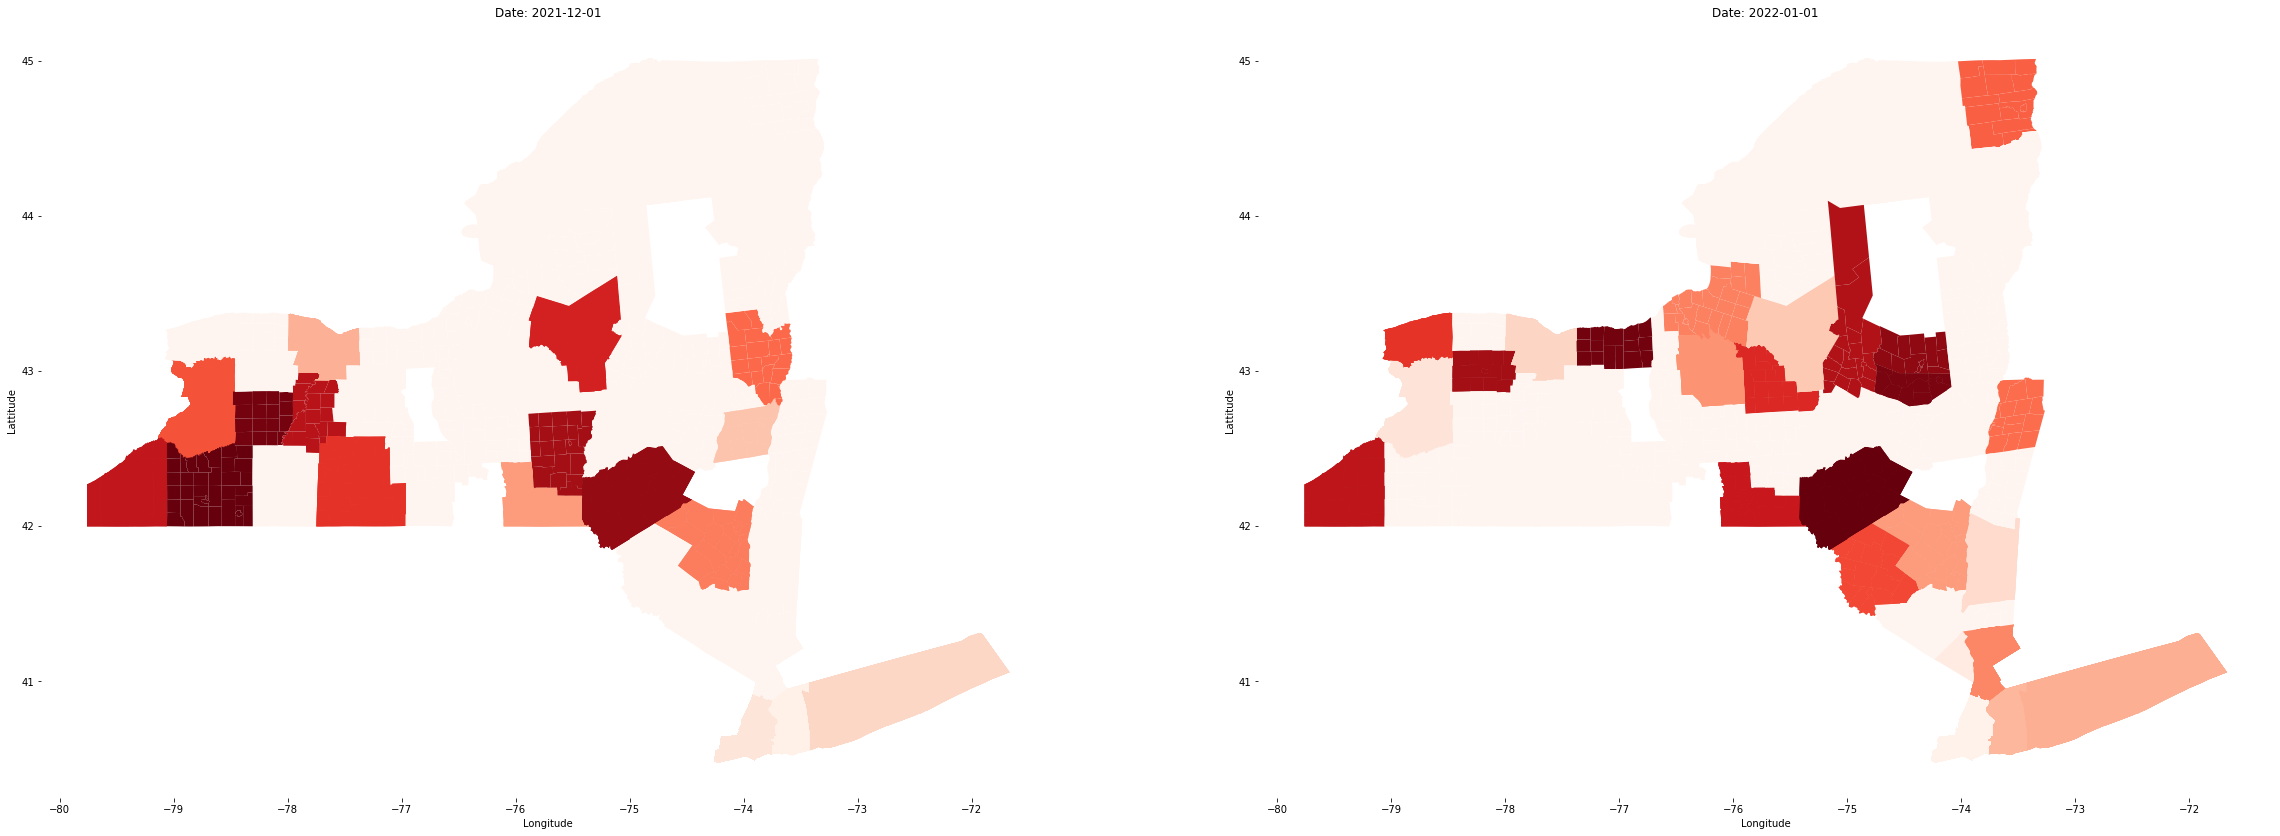

In [34]:
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-12-01',ax1),('2022-01-01',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_deaths_by_pop', ax=ax, fig=fig, title="Date: "+date)

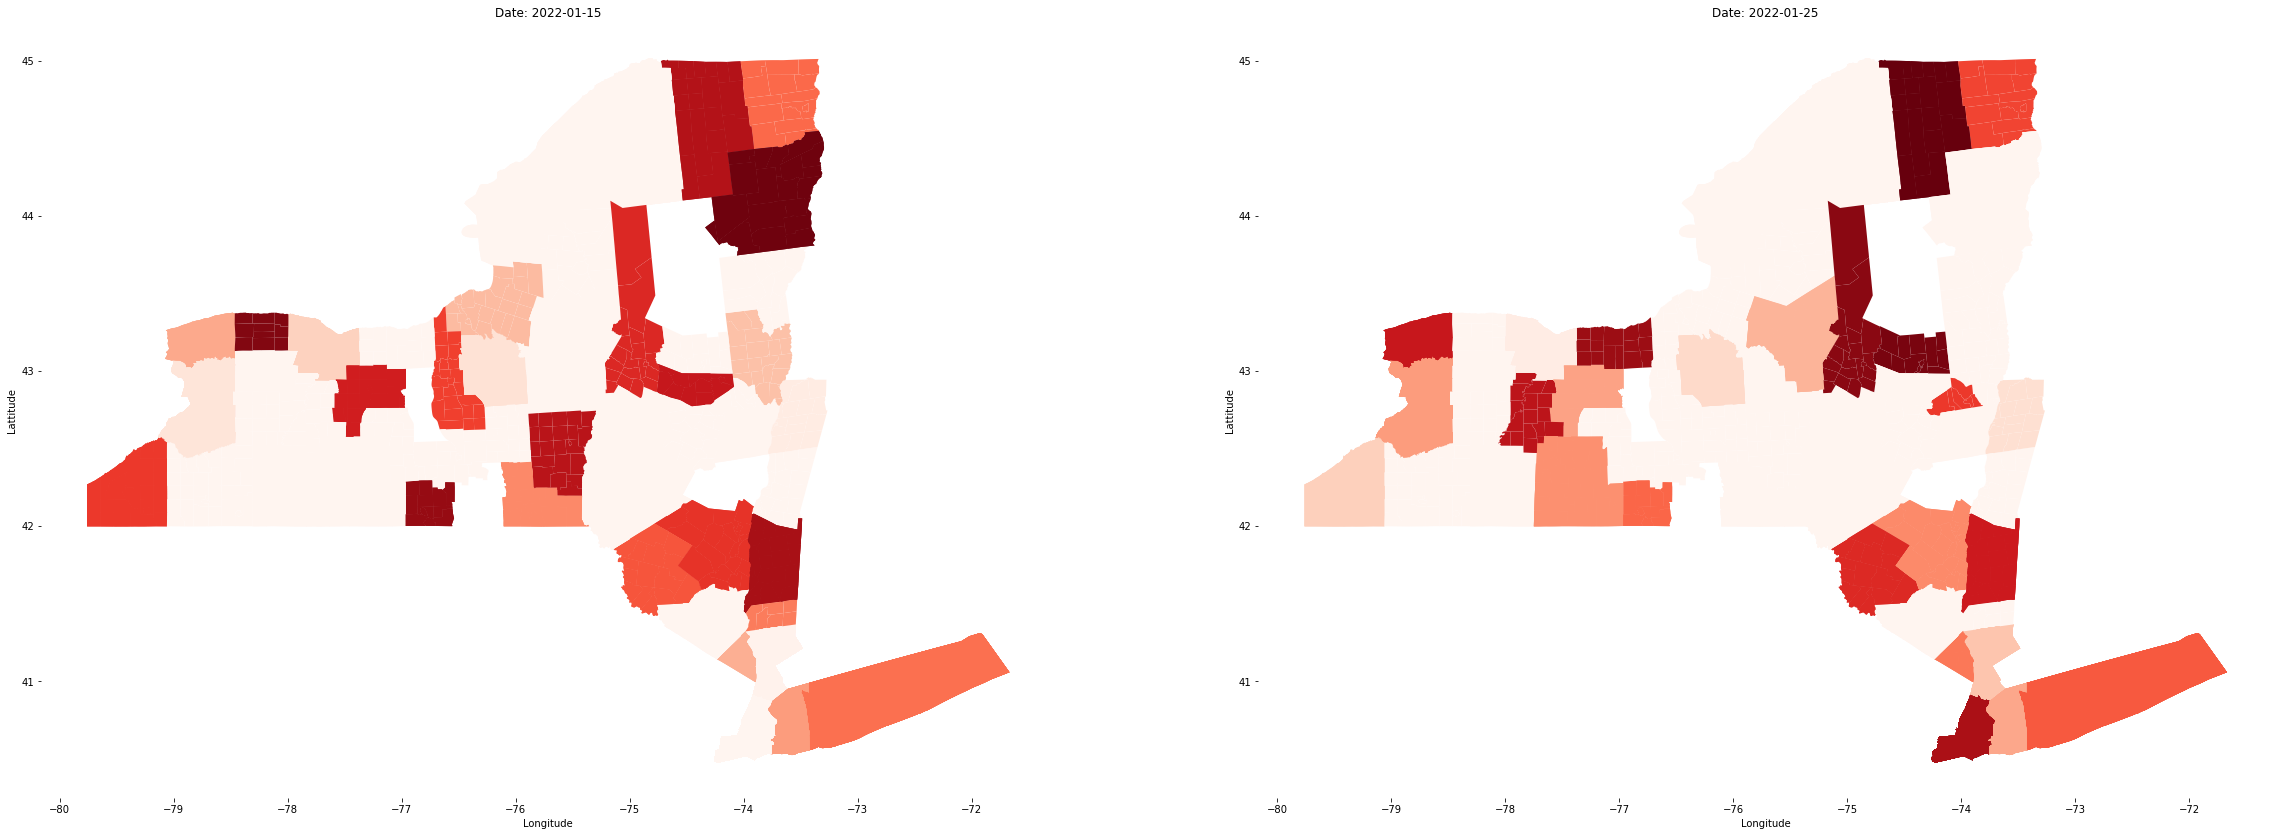

In [35]:
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2022-01-15',ax1),('2022-01-25',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_deaths_by_pop', ax=ax, fig=fig, title="Date: "+date)

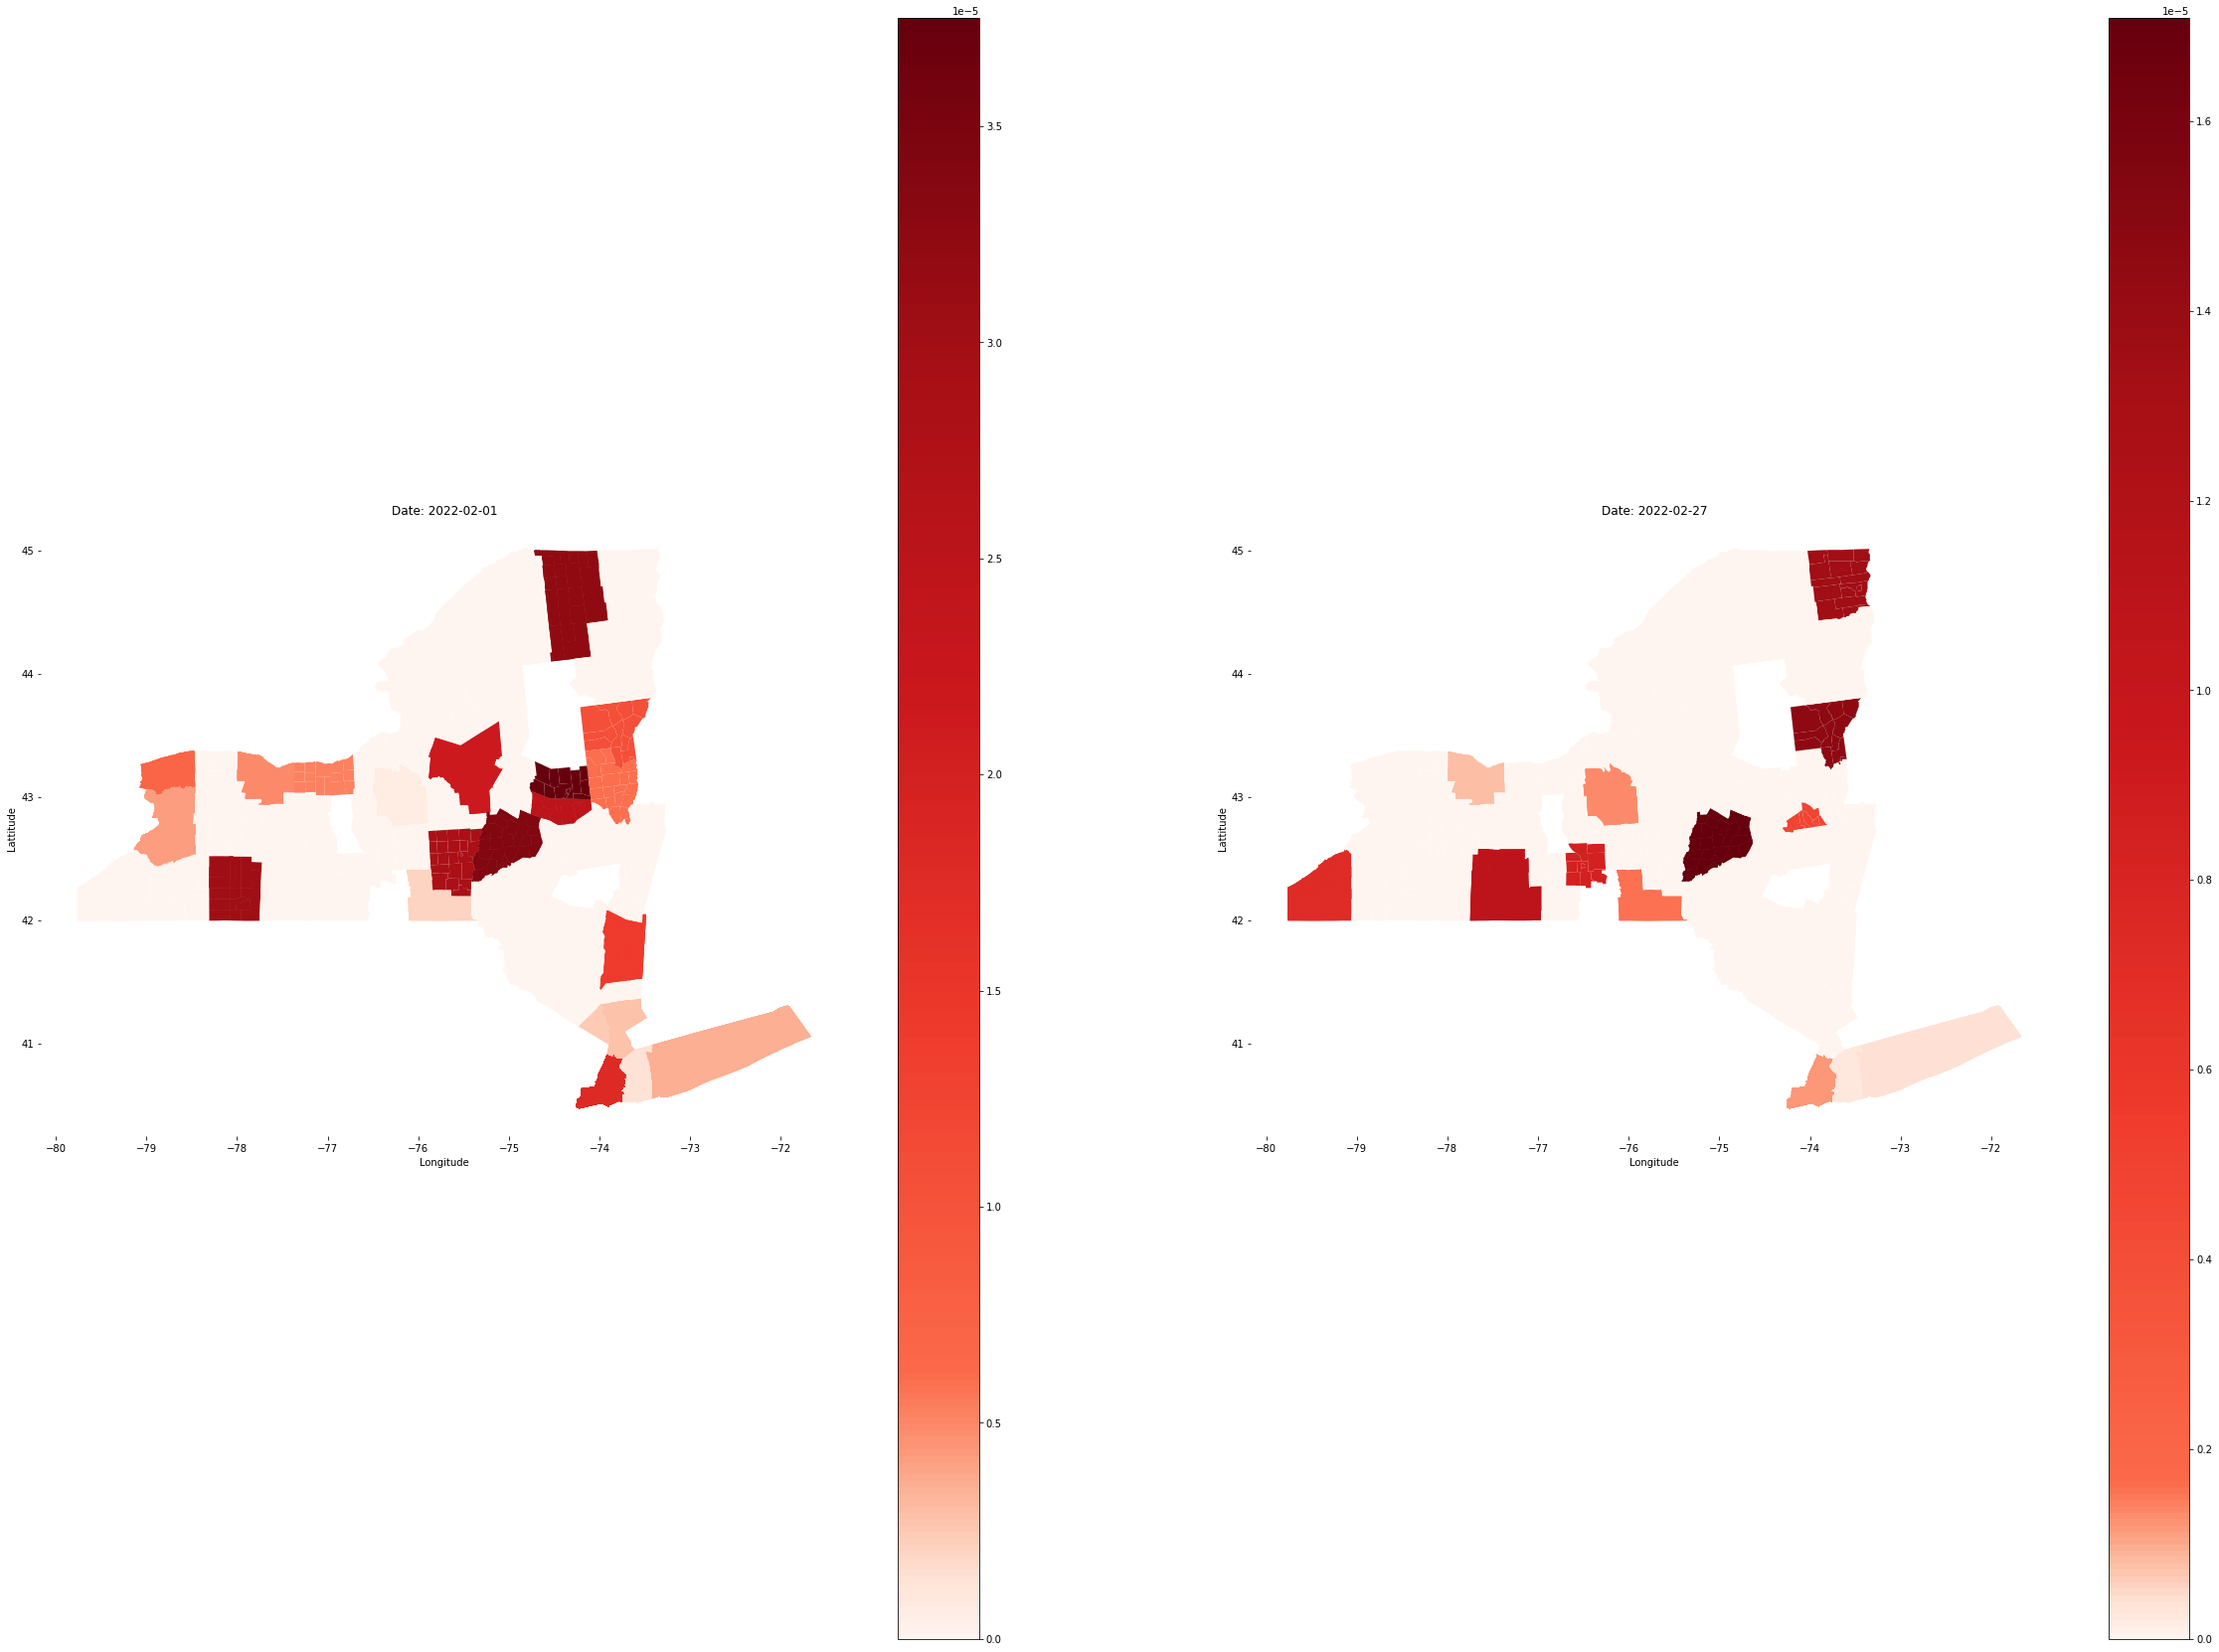

In [36]:
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2022-02-01',ax1),('2022-02-27',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_deaths_by_pop', ax=ax, fig=fig, title="Date: "+date,show_base_cbar=True)

**In each subsequent wave, however, the nation’s least dense counties have registered higher death rates than the most densely populated places**

**Take aways :**

1. During the first wave, the covid death rate was more in counties with high population.
2. Over the course of Pandemic the deaths were more among the least densely populated counties than the densely populated counties.

**As with every aspect of COVID-19, it’s too soon to assert causation; there’s still too much about the disease we don’t understand**